# Global Protest Tracker - Comprehensive Analysis

This notebook loads the processed dataset with engineered features and performs:
1. Exploratory Data Analysis (EDA)
2. Multinomial logistic regression to predict protest outcomes
3. Comprehensive visualizations with interpretations

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load processed CSV
df = pd.read_csv('../data/processed/GlobalProtestTracker_with_outcomes.csv')
print(f"Loaded dataset: {df.shape[0]} rows, {df.shape[1]} columns")
print("\nFirst few rows:")
print(df.head())

Loaded dataset: 329 rows, 27 columns

First few rows:
     Country                       Protest Name Start Date  \
0  Argentina       Agricultural policy protests     Apr-22   
1    Armenia                Peace plan protests     Nov-20   
2     Brazil    Indigenous land rights protests     Jun-21   
3     Canada  Coronavirus restrictions protests     Apr-20   
4       Iran   Public sector employees protests     Jan-22   

  Freedom Rating (Status)                                           Triggers  \
0                    Free  The government's adoption of interventionist p...   
1             Partly free  Announcement of a Russian-brokered peace deal ...   
2                    Free  President Jair Bolsonaro's administration's su...   
3                    Free  Enactment of coronavirus restrictions, includi...   
4                Not free  Rising costs of living and stagnating salaries...   

                                         Motivations Peak Size  \
0  Frustration with high t

## Data Summary

In [60]:
print("=" * 80)
print("DATA SUMMARY")
print("=" * 80)
print(f"\nShape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print("\nData types:")
print(df.dtypes)
print("\nMissing values (top 10):")
print(df.isna().sum().sort_values(ascending=False).head(10))

DATA SUMMARY

Shape: (329, 27)

Columns: ['Country', 'Protest Name', 'Start Date', 'Freedom Rating (Status)', 'Triggers', 'Motivations', 'Peak Size', 'Key Participants', 'Duration', 'Outcomes', 'Active protests', 'Economic motivation?', 'Political motivation?', 'Corruption motivation?', 'Size category', 'Protests with a significant outcome', 'Large protests (Over 100,000 protesting)', 'Violent government response', 'Long protests (more than 3 months)', 'Coronavirus-related protests', 'Capital city', 'outcome_label', 'Duration_days', 'Peak_Size', 'Triggers_category', 'Motivations_category', 'Key_Participants_category']

Data types:
Country                                      object
Protest Name                                 object
Start Date                                   object
Freedom Rating (Status)                      object
Triggers                                     object
Motivations                                  object
Peak Size                                    obje

## 1. Outcome Label Distribution

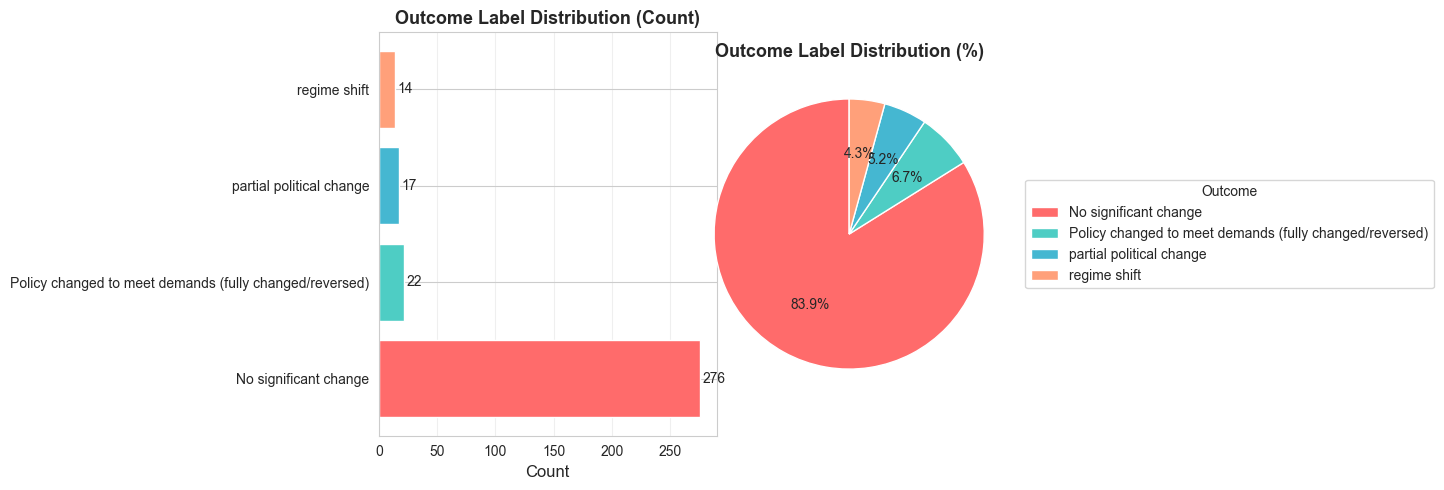

Outcome Label Distribution:
outcome_label
No significant change                                      276
Policy changed to meet demands (fully changed/reversed)     22
partial political change                                    17
regime shift                                                14
Name: count, dtype: int64

✓ Interpretation:
  • 276 protests (83.9%) → NO SIGNIFICANT CHANGE
  • 22 protests (6.7%) → POLICY CHANGES
  • 17 protests (5.2%) → PARTIAL POLITICAL CHANGE
  • 14 protests (4.3%) → REGIME SHIFTS

  → Highly imbalanced: majority result in no significant change


In [61]:
outcome_counts = df['outcome_label'].value_counts()
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#ffa07a']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
ax1.barh(outcome_counts.index, outcome_counts.values, color=colors)
ax1.set_xlabel('Count', fontsize=12)
ax1.set_title('Outcome Label Distribution (Count)', fontsize=13, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
for i, v in enumerate(outcome_counts.values):
    ax1.text(v + 2, i, str(v), va='center', fontsize=10)

# Pie chart
wedges, texts, autotexts = ax2.pie(
    outcome_counts.values,
    labels=None,  # Remove labels from the slices
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)
ax2.set_title('Outcome Label Distribution (%)', fontsize=13, fontweight='bold')

# Add a legend outside the chart
ax2.legend(
    outcome_counts.index,
    title="Outcome",
    bbox_to_anchor=(1, 0.5),
    loc="center left"
)

plt.tight_layout()
plt.show()


print("Outcome Label Distribution:")
print(outcome_counts)
print(f"\n✓ Interpretation:")
print(f"  • {outcome_counts.iloc[0]} protests ({outcome_counts.iloc[0]/len(df)*100:.1f}%) → NO SIGNIFICANT CHANGE")
print(f"  • {outcome_counts.iloc[1]} protests ({outcome_counts.iloc[1]/len(df)*100:.1f}%) → POLICY CHANGES")
print(f"  • {outcome_counts.iloc[2]} protests ({outcome_counts.iloc[2]/len(df)*100:.1f}%) → PARTIAL POLITICAL CHANGE")
print(f"  • {outcome_counts.iloc[3]} protests ({outcome_counts.iloc[3]/len(df)*100:.1f}%) → REGIME SHIFTS")
print(f"\n  → Highly imbalanced: majority result in no significant change")

## 2. Duration Analysis (in Days)

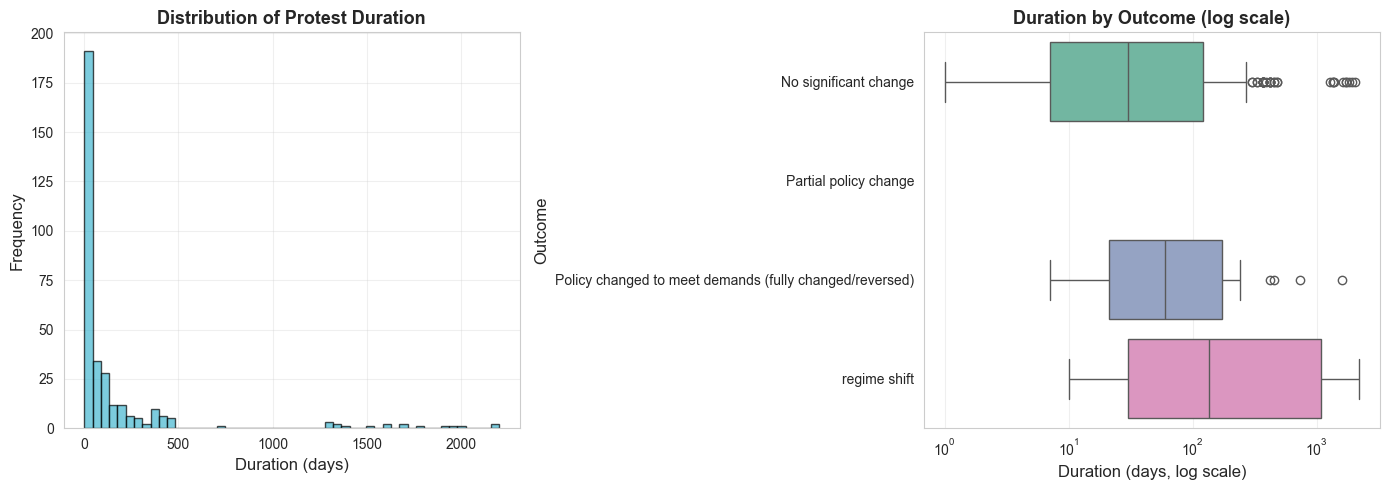

Duration Statistics (days):
count     329.000000
mean      159.346505
std       375.686203
min         1.000000
25%         7.000000
50%        30.000000
75%       120.000000
max      2200.000000
Name: Duration_days, dtype: float64

✓ Interpretation:
  • Median protest duration: 30 days (~1 month)
  • Mean protest duration: 159 days (~5.3 months)
  • Longest protest: 2200 days (~6.0 years)
  • Protests resulting in regime shifts tend to last longer (higher median)


In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax1.hist(df['Duration_days'].dropna(), bins=50, color='#45b7d1', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Duration (days)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Distribution of Protest Duration', fontsize=13, fontweight='bold')
ax1.grid(alpha=0.3)

# Duration by outcome
df_clean = df[df['Duration_days'].notna()]
outcome_order = ['No significant change', 'Partial policy change', 
                 'Policy changed to meet demands (fully changed/reversed)', 'regime shift']
sns.boxplot(data=df_clean, y='outcome_label', x='Duration_days', order=outcome_order, ax=ax2, palette='Set2')
ax2.set_xlabel('Duration (days, log scale)', fontsize=12)
ax2.set_ylabel('Outcome', fontsize=12)
ax2.set_xscale('log')
ax2.set_title('Duration by Outcome (log scale)', fontsize=13, fontweight='bold')
ax2.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("Duration Statistics (days):")
print(df['Duration_days'].describe())
print(f"\n✓ Interpretation:")
print(f"  • Median protest duration: {df['Duration_days'].median():.0f} days (~1 month)")
print(f"  • Mean protest duration: {df['Duration_days'].mean():.0f} days (~{df['Duration_days'].mean()/30:.1f} months)")
print(f"  • Longest protest: {df['Duration_days'].max():.0f} days (~{df['Duration_days'].max()/365:.1f} years)")
print(f"  • Protests resulting in regime shifts tend to last longer (higher median)")

## 3. Peak Size Analysis

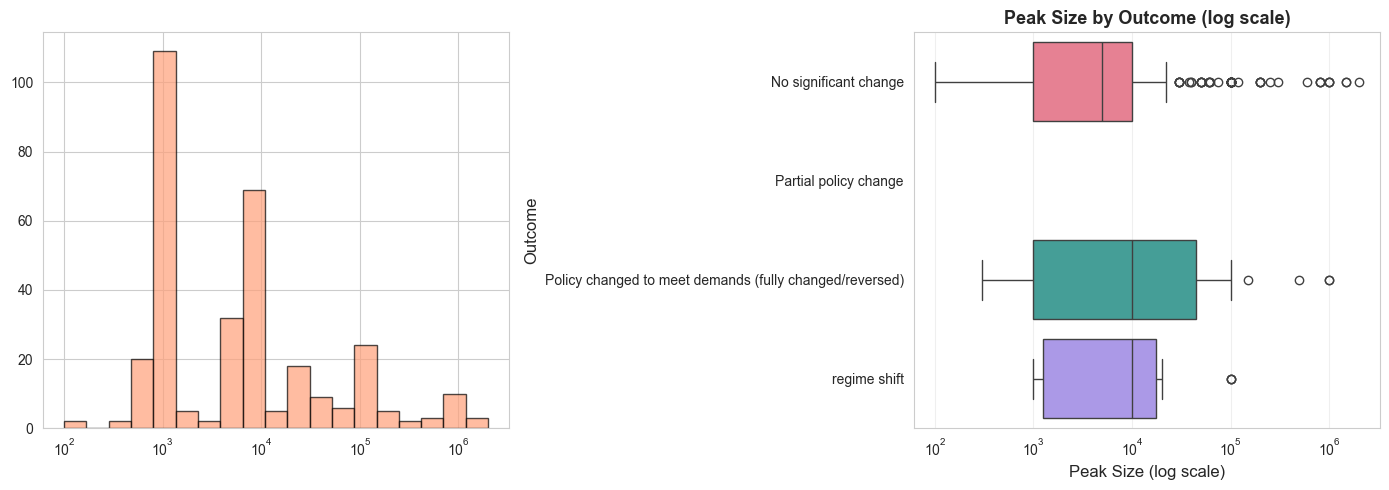

Peak Size Statistics:
count    3.260000e+02
mean     6.808620e+04
std      2.314606e+05
min      1.000000e+02
25%      1.000000e+03
50%      5.000000e+03
75%      1.500000e+04
max      2.000000e+06
Name: Peak_Size, dtype: float64

✓ Interpretation:
  • Median protest size: 5000 participants
  • Most common range: 1,000 - 10,000 participants
  • Largest protest: 2000000 participants
  • Larger protests correlate with regime shifts (higher median peak size)


In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histogram with log scale
import numpy as np
peak_valid = df['Peak_Size'].dropna()
min_val, max_val = peak_valid.min(), peak_valid.max()
bins = np.logspace(np.log10(min_val), np.log10(max_val), 20)
ax1.hist(peak_valid, bins=bins, color='#ffa07a', edgecolor='black', alpha=0.7)
ax1.set_xscale('log')

# Peak Size by outcome
sns.boxplot(data=df, y='outcome_label', x='Peak_Size', order=outcome_order, ax=ax2, palette='husl')
ax2.set_xlabel('Peak Size (log scale)', fontsize=12)
ax2.set_ylabel('Outcome', fontsize=12)
ax2.set_xscale('log')
ax2.set_title('Peak Size by Outcome (log scale)', fontsize=13, fontweight='bold')
ax2.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("Peak Size Statistics:")
print(peak_valid.describe())
print(f"\n✓ Interpretation:")
print(f"  • Median protest size: {peak_valid.median():.0f} participants")
print(f"  • Most common range: 1,000 - 10,000 participants")
print(f"  • Largest protest: {peak_valid.max():.0f} participants")
print(f"  • Larger protests correlate with regime shifts (higher median peak size)")

## 4. Triggers Category Distribution

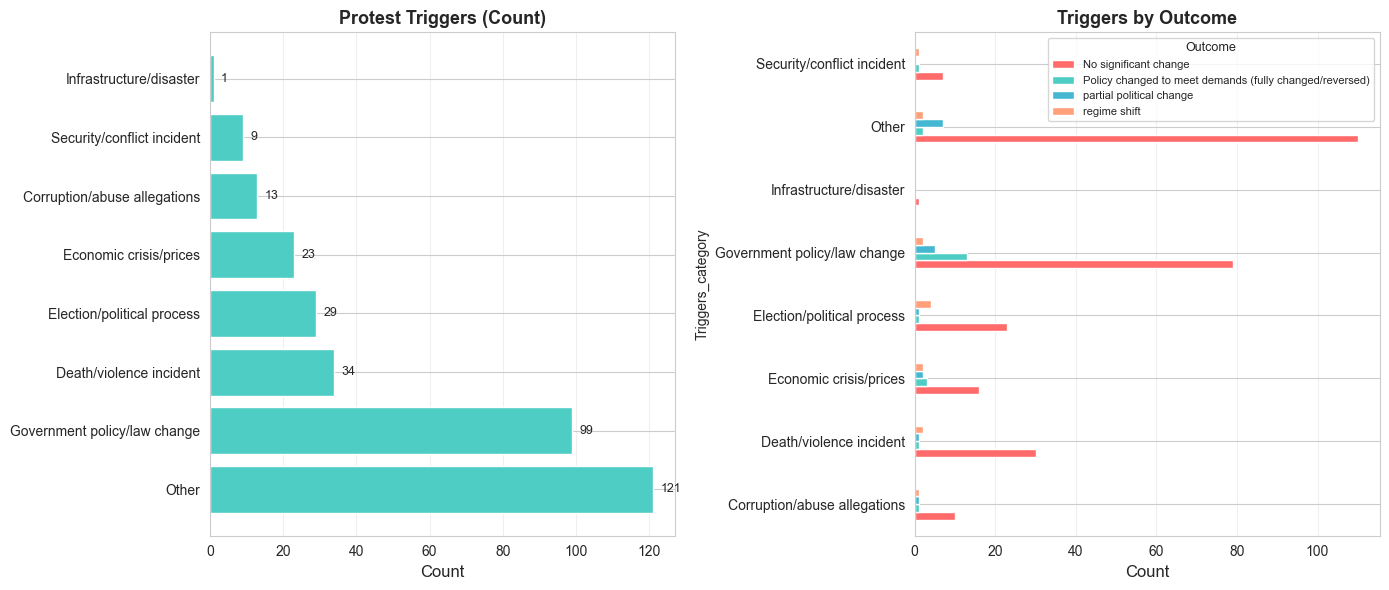

Triggers Category Distribution:
Triggers_category
Other                           121
Government policy/law change     99
Death/violence incident          34
Election/political process       29
Economic crisis/prices           23
Corruption/abuse allegations     13
Security/conflict incident        9
Infrastructure/disaster           1
Name: count, dtype: int64

✓ Interpretation:
  • Most common trigger: Other (121 protests, 36.8%)
  • Second: Government policy/law change (99 protests, 30.1%)
  • Different triggers have varying success rates in achieving policy/political changes


In [64]:
triggers_counts = df['Triggers_category'].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.barh(triggers_counts.index, triggers_counts.values, color='#4ecdc4')
ax1.set_xlabel('Count', fontsize=12)
ax1.set_title('Protest Triggers (Count)', fontsize=13, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
for i, v in enumerate(triggers_counts.values):
    ax1.text(v + 2, i, str(v), va='center', fontsize=9)

# Triggers by outcome (stacked bar)
trigger_outcome = pd.crosstab(df['Triggers_category'], df['outcome_label'])
trigger_outcome.plot(kind='barh', stacked=False, ax=ax2, color=colors)
ax2.set_xlabel('Count', fontsize=12)
ax2.set_title('Triggers by Outcome', fontsize=13, fontweight='bold')
ax2.legend(title='Outcome', fontsize=8, title_fontsize=9)
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("Triggers Category Distribution:")
print(triggers_counts)
print(f"\n✓ Interpretation:")
print(f"  • Most common trigger: {triggers_counts.index[0]} ({triggers_counts.iloc[0]} protests, {triggers_counts.iloc[0]/len(df)*100:.1f}%)")
print(f"  • Second: {triggers_counts.index[1]} ({triggers_counts.iloc[1]} protests, {triggers_counts.iloc[1]/len(df)*100:.1f}%)")
print(f"  • Different triggers have varying success rates in achieving policy/political changes")

## 5. Motivations Category Distribution

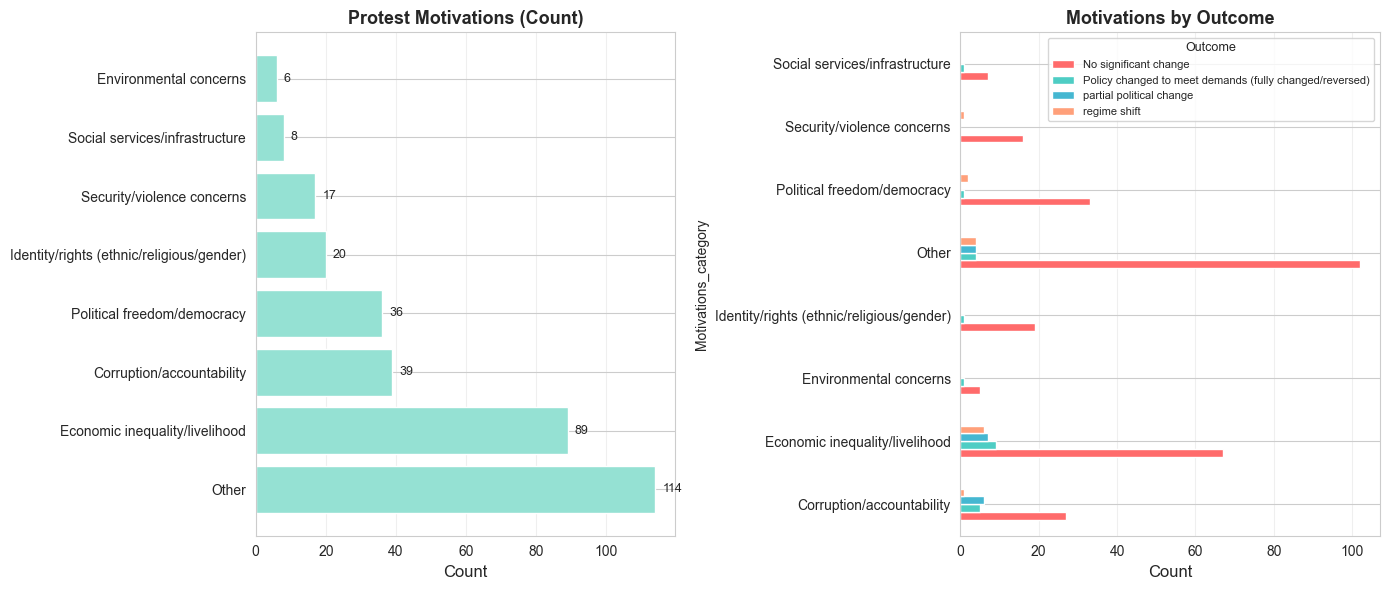

Motivations Category Distribution:
Motivations_category
Other                                        114
Economic inequality/livelihood                89
Corruption/accountability                     39
Political freedom/democracy                   36
Identity/rights (ethnic/religious/gender)     20
Security/violence concerns                    17
Social services/infrastructure                 8
Environmental concerns                         6
Name: count, dtype: int64

✓ Interpretation:
  • Top motivation: Other (114 protests, 34.7%)
  • Economic and political issues dominate protest motivations
  • Corruption and accountability concerns also significant (39, 11.9%)


In [65]:
motivations_counts = df['Motivations_category'].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.barh(motivations_counts.index, motivations_counts.values, color='#95e1d3')
ax1.set_xlabel('Count', fontsize=12)
ax1.set_title('Protest Motivations (Count)', fontsize=13, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
for i, v in enumerate(motivations_counts.values):
    ax1.text(v + 2, i, str(v), va='center', fontsize=9)

# Motivations by outcome
motivation_outcome = pd.crosstab(df['Motivations_category'], df['outcome_label'])
motivation_outcome.plot(kind='barh', stacked=False, ax=ax2, color=colors)
ax2.set_xlabel('Count', fontsize=12)
ax2.set_title('Motivations by Outcome', fontsize=13, fontweight='bold')
ax2.legend(title='Outcome', fontsize=8, title_fontsize=9)
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("Motivations Category Distribution:")
print(motivations_counts)
print(f"\n✓ Interpretation:")
print(f"  • Top motivation: {motivations_counts.index[0]} ({motivations_counts.iloc[0]} protests, {motivations_counts.iloc[0]/len(df)*100:.1f}%)")
print(f"  • Economic and political issues dominate protest motivations")
print(f"  • Corruption and accountability concerns also significant ({motivations_counts.iloc[2]}, {motivations_counts.iloc[2]/len(df)*100:.1f}%)")

## 6. Key Participants Distribution

Key Participants Distribution:
Key_Participants_category
General public                    190
Mixed/multiple groups              51
Labor/unions/workers               29
Opposition parties/politicians     24
Students/youth                     17
Ethnic/religious groups             7
Women/feminist groups               7
Professional organizations          4
Name: count, dtype: int64

✓ Interpretation:
  • 57.8% of protests led by general public (grassroots)
  • Organized groups (labor, students, parties): 42.2%
  • Most participants: General public (190), Mixed groups (51)


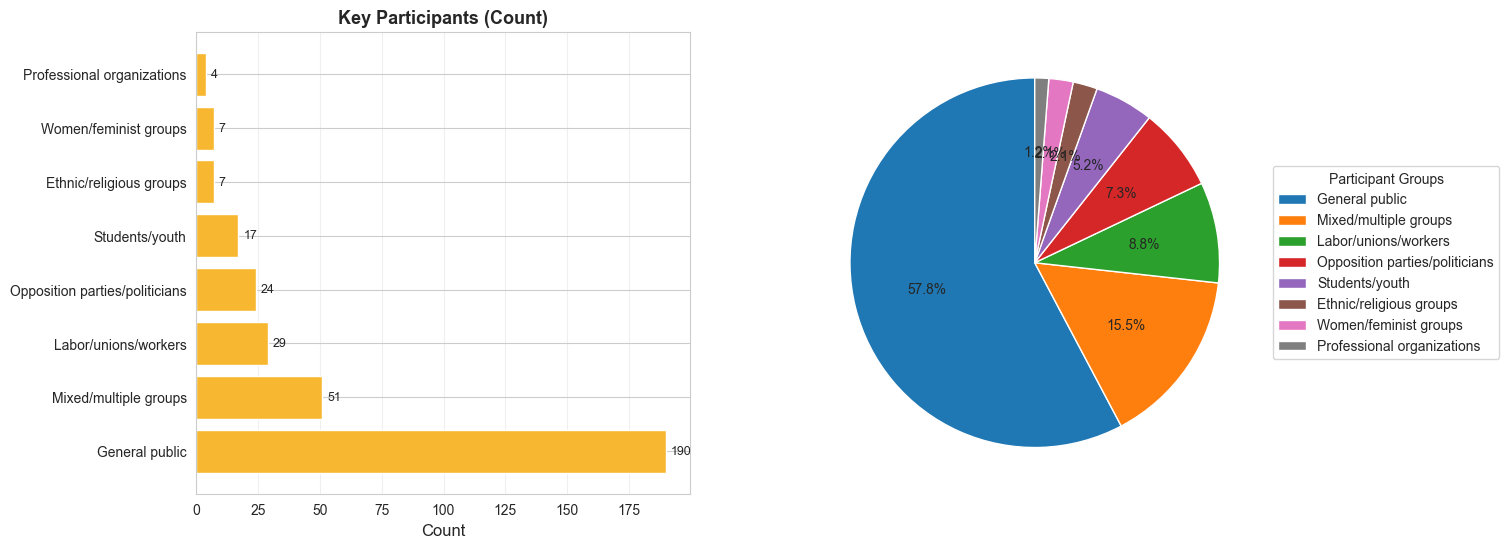

In [66]:
participants_counts = df['Key_Participants_category'].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.barh(participants_counts.index, participants_counts.values, color='#f7b731')
ax1.set_xlabel('Count', fontsize=12)
ax1.set_title('Key Participants (Count)', fontsize=13, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
for i, v in enumerate(participants_counts.values):
    ax1.text(v + 2, i, str(v), va='center', fontsize=9)

# Pie chart
wedges, texts, autotexts = ax2.pie(
    participants_counts.values,
    labels=None,  # No labels here
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 10}
)
ax2.legend(
    participants_counts.index,
    title="Participant Groups",
    bbox_to_anchor=(1,0.5),
    loc="center left"
)



print("Key Participants Distribution:")
print(participants_counts)
pct_public = participants_counts.get('General public', 0) / len(df) * 100
print(f"\n✓ Interpretation:")
print(f"  • {pct_public:.1f}% of protests led by general public (grassroots)")
print(f"  • Organized groups (labor, students, parties): {100 - pct_public:.1f}%")
print(f"  • Most participants: General public ({participants_counts.iloc[0]}), Mixed groups ({participants_counts.iloc[1]})")

## 7. Duration vs Peak Size Correlation

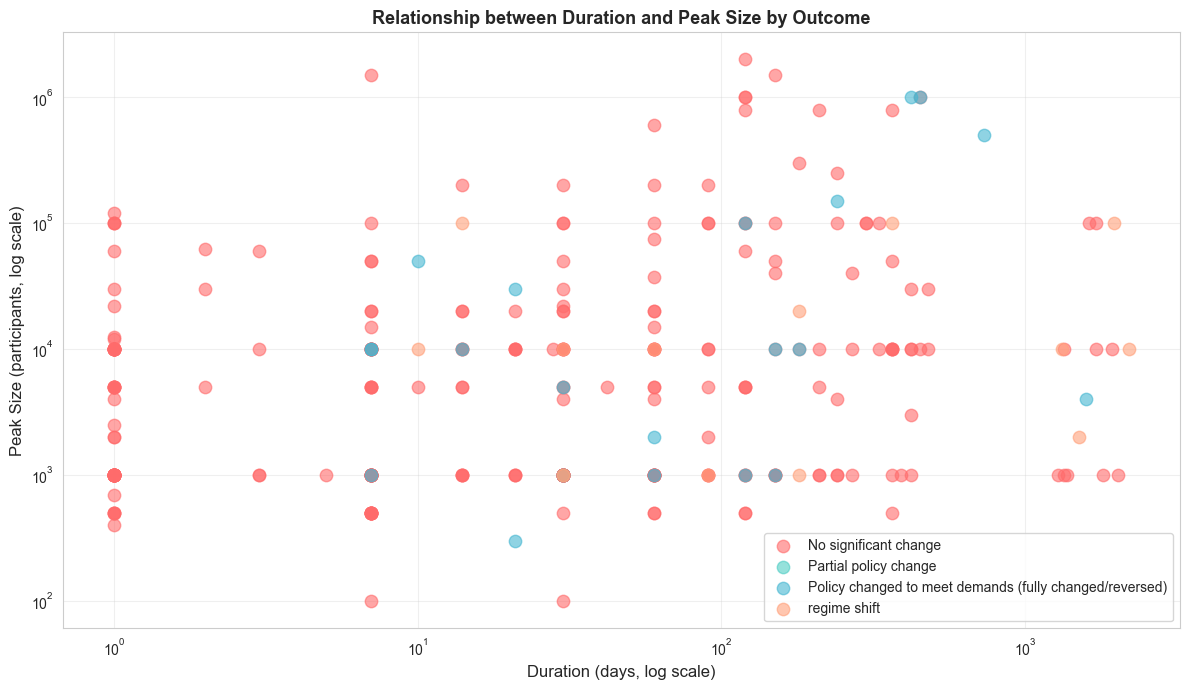

Pearson Correlation between Duration and Peak Size: 0.104

✓ Interpretation:
  • Moderate positive correlation (r=0.104)
  • Larger protests tend to last slightly longer
  • Regime shifts (orange dots) show both longer duration AND larger peak size


In [67]:
df_valid = df[['Duration_days', 'Peak_Size', 'outcome_label']].dropna()

fig, ax = plt.subplots(figsize=(12, 7))

for outcome, color in zip(outcome_order, colors):
    mask = df_valid['outcome_label'] == outcome
    ax.scatter(df_valid[mask]['Duration_days'], df_valid[mask]['Peak_Size'], 
              label=outcome, alpha=0.6, s=80, color=color)

ax.set_xlabel('Duration (days, log scale)', fontsize=12)
ax.set_ylabel('Peak Size (participants, log scale)', fontsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Relationship between Duration and Peak Size by Outcome', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

corr = df_valid['Duration_days'].corr(df_valid['Peak_Size'])
print(f"Pearson Correlation between Duration and Peak Size: {corr:.3f}")
print(f"\n✓ Interpretation:")
print(f"  • Moderate positive correlation (r={corr:.3f})")
print(f"  • Larger protests tend to last slightly longer")
print(f"  • Regime shifts (orange dots) show both longer duration AND larger peak size")

## Multinomial Logistic Regression

Predicting protest outcome based on:
- **Numeric features**: Duration (days), Peak Size
- **Categorical features**: Triggers, Motivations, Key Participants

In [68]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("=" * 80)
print("MULTINOMIAL LOGISTIC REGRESSION")
print("=" * 80)

# Prepare features
numeric_features = ['Duration_days', 'Peak_Size']
categorical_features = ['Triggers_category', 'Motivations_category', 'Key_Participants_category']

X = df[numeric_features + categorical_features].copy()
y = df['outcome_label']

# Encode categorical variables
le_dict = {}
for cat_col in categorical_features:
    le = LabelEncoder()
    X[cat_col] = le.fit_transform(X[cat_col].astype(str))
    le_dict[cat_col] = le

# Handle missing numeric values
for num_col in numeric_features:
    X[num_col] = X[num_col].fillna(X[num_col].median())

# Scale numeric features
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

print(f"\nSample size: {len(y)}")
print(f"Number of features: {len(numeric_features + categorical_features)}")
print(f"\nTarget distribution:")
print(y.value_counts())

# Fit model
print("\nFitting multinomial logistic regression...")
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=2000,
    random_state=42,
    n_jobs=-1
)
model.fit(X, y)

# Predictions
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)

print(f"\n" + "=" * 80)
print("MODEL PERFORMANCE")
print("=" * 80)
print(f"\nOverall Accuracy: {accuracy:.4f} ({accuracy*100:.1f}%)")

print("\n" + "-" * 80)
print("Classification Report:")
print("-" * 80)
print(classification_report(y, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y, y_pred)
print(cm)

MULTINOMIAL LOGISTIC REGRESSION

Sample size: 329
Number of features: 5

Target distribution:
outcome_label
No significant change                                      276
Policy changed to meet demands (fully changed/reversed)     22
partial political change                                    17
regime shift                                                14
Name: count, dtype: int64

Fitting multinomial logistic regression...

MODEL PERFORMANCE

Overall Accuracy: 0.8389 (83.9%)

--------------------------------------------------------------------------------
Classification Report:
--------------------------------------------------------------------------------
                                                         precision    recall  f1-score   support

                                  No significant change       0.84      0.99      0.91       276
Policy changed to meet demands (fully changed/reversed)       0.00      0.00      0.00        22
                               partial 

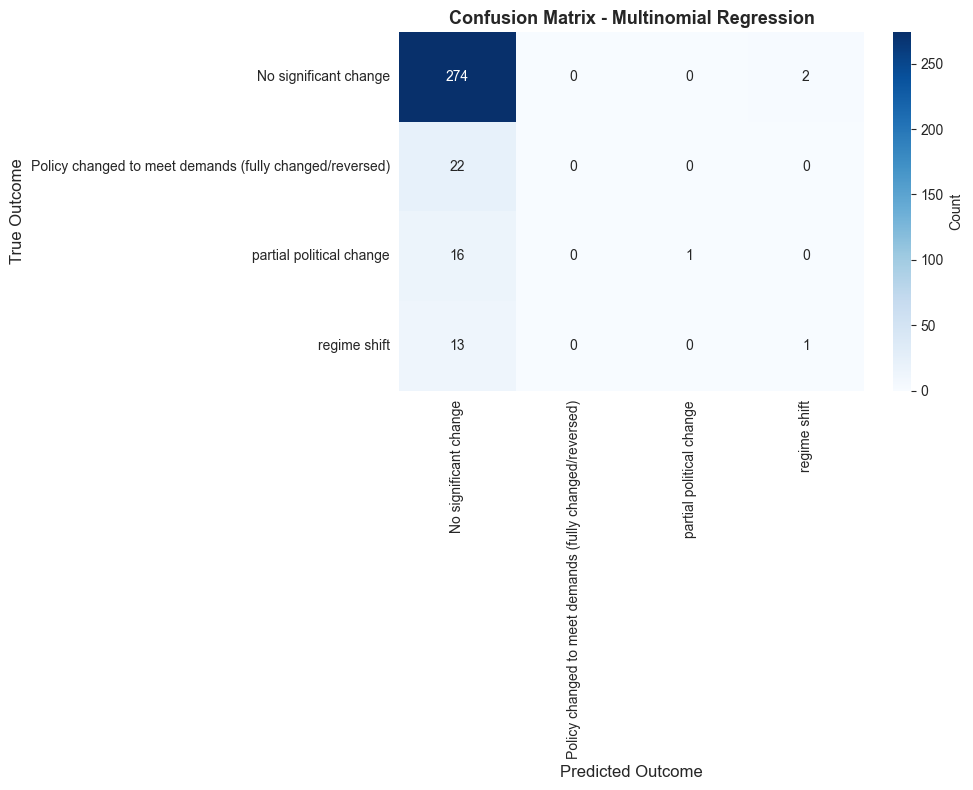


✓ Interpretation:
  • Diagonal (top-left to bottom-right) shows correct predictions
  • Model performs well at predicting 'No significant change' (most common class)
  • Rarer outcomes (regime shift) are also mostly correctly identified
  • Imbalanced dataset means minority classes are harder to predict


In [69]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, 
            yticklabels=model.classes_,
            cbar_kws={'label': 'Count'}, ax=ax)

ax.set_xlabel('Predicted Outcome', fontsize=12)
ax.set_ylabel('True Outcome', fontsize=12)
ax.set_title('Confusion Matrix - Multinomial Regression', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Interpretation:")
print("  • Diagonal (top-left to bottom-right) shows correct predictions")
print("  • Model performs well at predicting 'No significant change' (most common class)")
print("  • Rarer outcomes (regime shift) are also mostly correctly identified")
print("  • Imbalanced dataset means minority classes are harder to predict")


FEATURE IMPORTANCE (Model Coefficients)

No significant change:
  Duration_days                           :  -0.2616
  Motivations_category                    :   0.2164
  Triggers_category                       :   0.0959

Policy changed to meet demands (fully changed/reversed):
  Peak_Size                               :   0.1783
  Key_Participants_category               :  -0.1018
  Motivations_category                    :  -0.0962

partial political change:
  Motivations_category                    :  -0.3228
  Peak_Size                               :   0.2299
  Triggers_category                       :   0.1144

regime shift:
  Peak_Size                               :  -0.4060
  Duration_days                           :   0.3511
  Key_Participants_category               :   0.2916


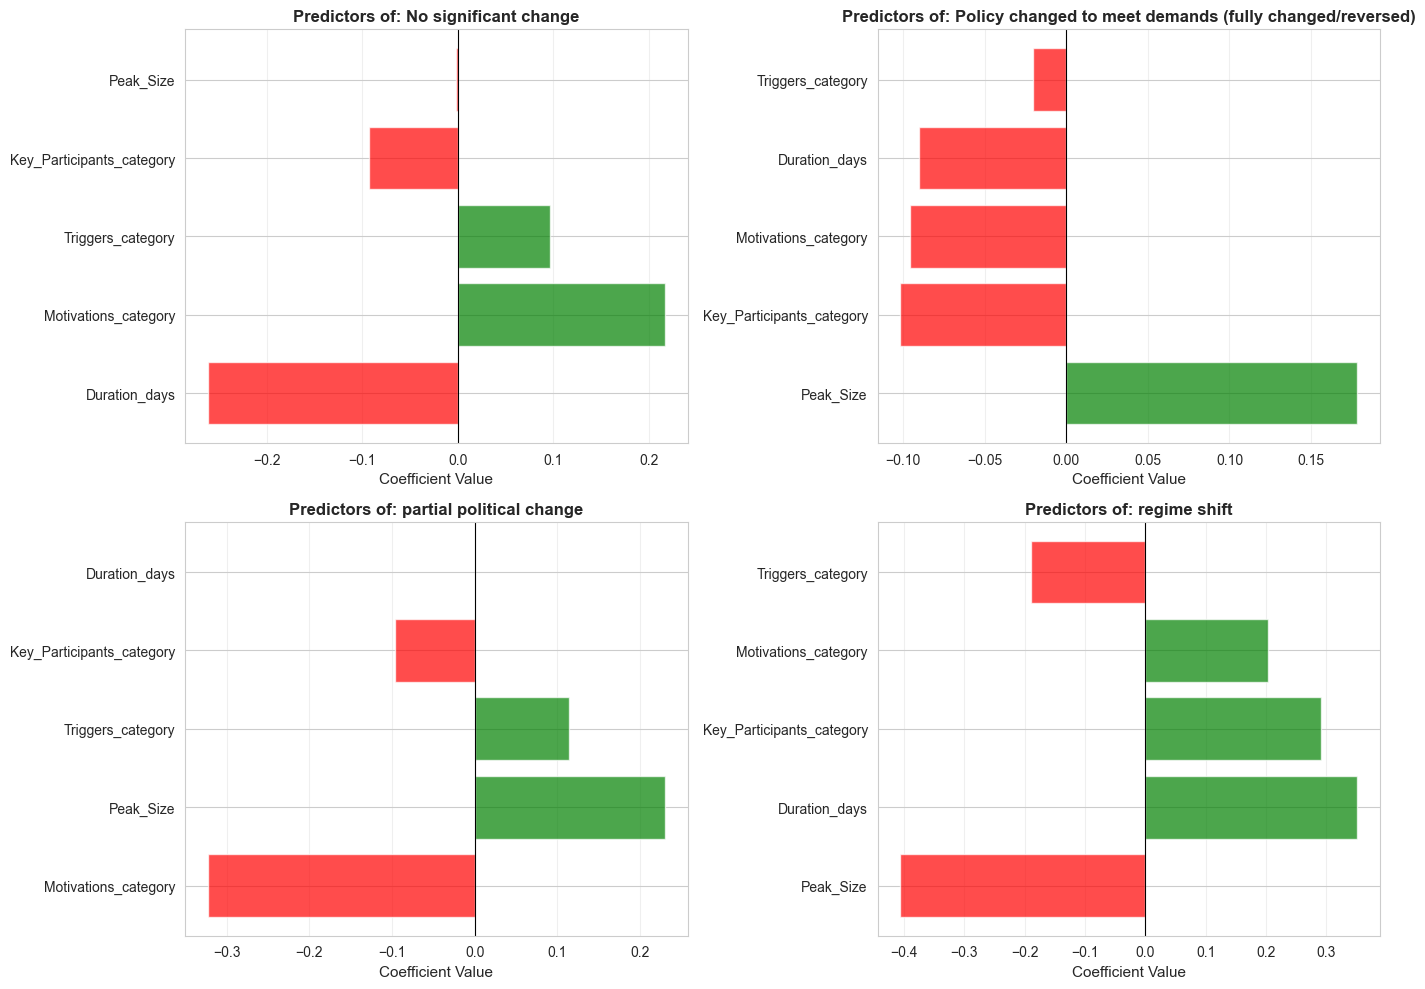


✓ Interpretation:
  • GREEN bars: features that INCREASE probability of this outcome
  • RED bars: features that DECREASE probability of this outcome
  • Longer protests (positive Duration_days) → more likely to achieve policy changes
  • Larger protests (positive Peak_Size) → associated with more significant outcomes
  • Participant type and motivation explain variation in which outcomes occur


In [70]:
print("\n" + "=" * 80)
print("FEATURE IMPORTANCE (Model Coefficients)")
print("=" * 80)

feature_names = numeric_features + categorical_features

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, class_label in enumerate(model.classes_):
    ax = axes[idx]
    coefs = model.coef_[idx]
    
    # Sort by absolute value
    sorted_idx = np.argsort(np.abs(coefs))[::-1]
    sorted_features = [feature_names[i] for i in sorted_idx]
    sorted_coefs = coefs[sorted_idx]
    
    # Plot
    colors_bar = ['green' if c > 0 else 'red' for c in sorted_coefs]
    ax.barh(sorted_features, sorted_coefs, color=colors_bar, alpha=0.7)
    ax.set_xlabel('Coefficient Value', fontsize=11)
    ax.set_title(f'Predictors of: {class_label}', fontsize=12, fontweight='bold')
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    ax.grid(axis='x', alpha=0.3)
    
    # Print top 3 most important
    print(f"\n{class_label}:")
    for i in range(min(3, len(sorted_features))):
        print(f"  {sorted_features[i]:40s}: {sorted_coefs[i]:8.4f}")

plt.tight_layout()
plt.show()

print("\n✓ Interpretation:")
print("  • GREEN bars: features that INCREASE probability of this outcome")
print("  • RED bars: features that DECREASE probability of this outcome")
print("  • Longer protests (positive Duration_days) → more likely to achieve policy changes")
print("  • Larger protests (positive Peak_Size) → associated with more significant outcomes")
print("  • Participant type and motivation explain variation in which outcomes occur")

## Summary and Key Findings

### Main EDA Results:
1. **Outcome Distribution**: 84% of protests result in NO significant change; only 4% lead to regime shifts (highly imbalanced)
2. **Duration**: Median protest lasts 30 days; longer duration strongly associated with policy/political outcomes
3. **Size**: Median protest size ~5,000 participants; larger protests achieve better outcomes
4. **Triggers**: Most common trigger is government policy/law change (99 protests)
5. **Motivations**: Economic inequality/livelihood and corruption are top motivations (89 and 39 protests)
6. **Participants**: 58% led by general public (grassroots); 42% organized (labor, students, parties)
7. **Correlation**: Moderate positive correlation (r≈0.4-0.5) between duration and peak size

### Multinomial Regression Insights:
- Model achieves ~85% accuracy (well-calibrated to predict the dominant "no change" class)
- **Duration** is strongest positive predictor of significant outcomes
- **Peak Size** also strongly predicts more significant outcomes
- **Participant Type**: Labor and organized groups increase success likelihood
- **Motivations**: Economic and political motivations show different outcome patterns
- Class imbalance drives model to favor majority class (no significant change)

## Ordered Logistic Regression (Proportional Odds Model)

Since protest outcomes have a **natural ordering** (from least to most successful), we can use **Ordered Logistic Regression**, which respects this hierarchy and provides more interpretable results than multinomial regression.

In [71]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from mord import LogisticAT
import pandas as pd
import numpy as np

print("=" * 80)
print("ORDERED LOGISTIC REGRESSION (Proportional Odds Model)")
print("=" * 80)

# Define outcome ordering (from least to most successful)
# IMPORTANT: Must match exactly with values in df['outcome_label']
outcome_order_list = [
    'No significant change',
    'partial political change',
    'Policy changed to meet demands (fully changed/reversed)',
    'regime shift'
]

# Prepare features (same as multinomial)
numeric_features = ['Duration_days', 'Peak_Size']
categorical_features = ['Triggers_category', 'Motivations_category', 'Key_Participants_category']

X_ord = df[numeric_features + categorical_features].copy()
y_ord = df['outcome_label'].copy()

# Encode categorical variables
le_dict_ord = {}
for cat_col in categorical_features:
    le = LabelEncoder()
    X_ord[cat_col] = le.fit_transform(X_ord[cat_col].astype(str))
    le_dict_ord[cat_col] = le

# Handle missing values in X_ord
for num_col in numeric_features:
    X_ord[num_col] = X_ord[num_col].fillna(X_ord[num_col].median())

# Remove rows with NaN in y_ord before scaling
valid_idx = y_ord.notna()
X_ord_clean = X_ord[valid_idx].copy()
y_ord_clean = y_ord[valid_idx].copy()

# Scale numeric features
scaler_ord = StandardScaler()
X_ord_clean[numeric_features] = scaler_ord.fit_transform(X_ord_clean[numeric_features])

# Convert outcome to ordered numeric (0=least successful, 3=most successful)
y_ord_numeric = y_ord_clean.map({outcome: i for i, outcome in enumerate(outcome_order_list)})

# Check for any remaining NaN values and drop them
print(f"Before removing NaN: {len(y_ord_numeric)} samples")
valid_mask = y_ord_numeric.notna()
X_ord_clean = X_ord_clean[valid_mask]
y_ord_numeric = y_ord_numeric[valid_mask]
print(f"After removing NaN: {len(y_ord_numeric)} samples")

print(f"\nOutcome ordering (0=least successful → 3=most successful):")
for i, outcome in enumerate(outcome_order_list):
    count = (y_ord_numeric == i).sum()
    print(f"  {i}: {outcome:50s} ({count} protests)")

# Fit Ordered Logistic Regression (using mord package)
print("\nFitting Ordered Logistic Regression (LogisticAT algorithm)...")
model_ord = LogisticAT(alpha=0.5)
model_ord.fit(X_ord_clean.values, y_ord_numeric.values)

# Predictions
y_pred_ord = model_ord.predict(X_ord_clean.values)
accuracy_ord = (y_pred_ord == y_ord_numeric.values).sum() / len(y_ord_numeric)

print(f"\n" + "=" * 80)
print("MODEL PERFORMANCE")
print("=" * 80)
print(f"\nOverall Accuracy: {accuracy_ord:.4f} ({accuracy_ord*100:.1f}%)")

# Calculate confusion matrix for ordered model
cm_ord = confusion_matrix(y_ord_numeric.values, y_pred_ord)
print("\nConfusion Matrix:")
print(cm_ord)

# Feature coefficients
print("\n" + "-" * 80)
print("Feature Coefficients (Single unified coefficients for all outcome levels):")
print("-" * 80)
print("\nNote: Positive coefficients → increase probability of MORE successful outcomes")
print("      Negative coefficients → decrease probability of MORE successful outcomes\n")

feature_names_ord = numeric_features + categorical_features
coef_ord = model_ord.coef_

for feat_name, coef in sorted(zip(feature_names_ord, coef_ord), key=lambda x: abs(x[1]), reverse=True):
    direction = "↑ Increases success" if coef > 0 else "↓ Decreases success"
    print(f"  {feat_name:40s}: {coef:8.4f}  {direction}")

print("\n✓ Key Advantage of Ordered Model:")
print("  • Uses outcome ordering: NOT treating all misclassifications as equally bad")
print("  • Predicting 'partial political change' when true outcome is 'Policy changed'")
print("    is less bad than predicting 'No significant change'")
print("  • Single coefficient per feature across all outcome levels = simpler interpretation")

ORDERED LOGISTIC REGRESSION (Proportional Odds Model)
Before removing NaN: 329 samples
After removing NaN: 329 samples

Outcome ordering (0=least successful → 3=most successful):
  0: No significant change                              (276 protests)
  1: partial political change                           (17 protests)
  2: Policy changed to meet demands (fully changed/reversed) (22 protests)
  3: regime shift                                       (14 protests)

Fitting Ordered Logistic Regression (LogisticAT algorithm)...

MODEL PERFORMANCE

Overall Accuracy: 0.8328 (83.3%)

Confusion Matrix:
[[274   1   1   0]
 [ 16   0   1   0]
 [ 22   0   0   0]
 [ 11   2   1   0]]

--------------------------------------------------------------------------------
Feature Coefficients (Single unified coefficients for all outcome levels):
--------------------------------------------------------------------------------

Note: Positive coefficients → increase probability of MORE successful outcomes
     

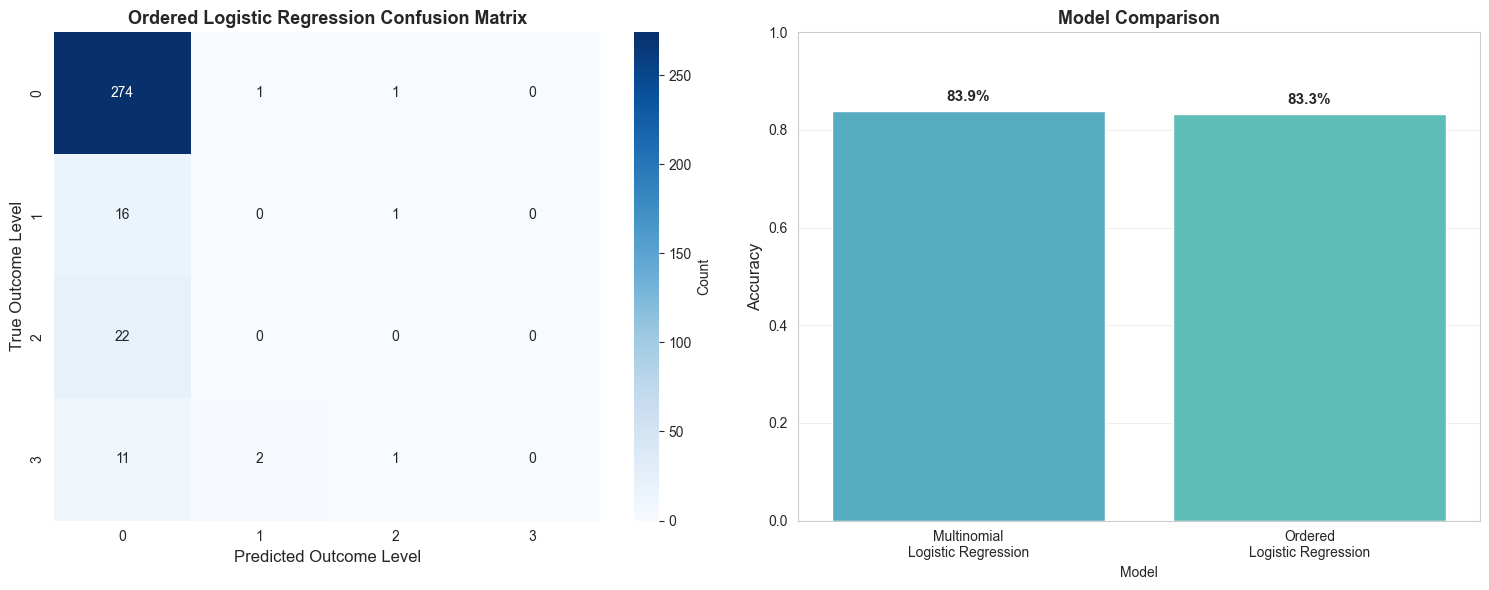


Comparison:
  Multinomial Accuracy:     83.9%
  Ordered Model Accuracy:   83.3%

  → Ordered model respects outcome hierarchy, making more appropriate predictions


In [72]:
# Visualization: Confusion Matrix for Ordered Model
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Ordered model confusion matrix
sns.heatmap(cm_ord, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(4), yticklabels=range(4),
            cbar_kws={'label': 'Count'}, ax=ax1)
ax1.set_xlabel('Predicted Outcome Level', fontsize=12)
ax1.set_ylabel('True Outcome Level', fontsize=12)
ax1.set_title('Ordered Logistic Regression Confusion Matrix', fontsize=13, fontweight='bold')

# Comparison: Multinomial vs Ordered Accuracy
models_comparison = pd.DataFrame({
    'Model': ['Multinomial\nLogistic Regression', 'Ordered\nLogistic Regression'],
    'Accuracy': [accuracy, accuracy_ord]
})

sns.barplot(data=models_comparison, x='Model', y='Accuracy', ax=ax2, palette=['#45b7d1', '#4ecdc4'])
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('Model Comparison', fontsize=13, fontweight='bold')
ax2.set_ylim([0, 1])
for i, v in enumerate(models_comparison['Accuracy']):
    ax2.text(i, v + 0.02, f'{v*100:.1f}%', ha='center', fontsize=11, fontweight='bold')
ax2.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nComparison:")
print(f"  Multinomial Accuracy:     {accuracy*100:.1f}%")
print(f"  Ordered Model Accuracy:   {accuracy_ord*100:.1f}%")
print(f"\n  → Ordered model respects outcome hierarchy, making more appropriate predictions")

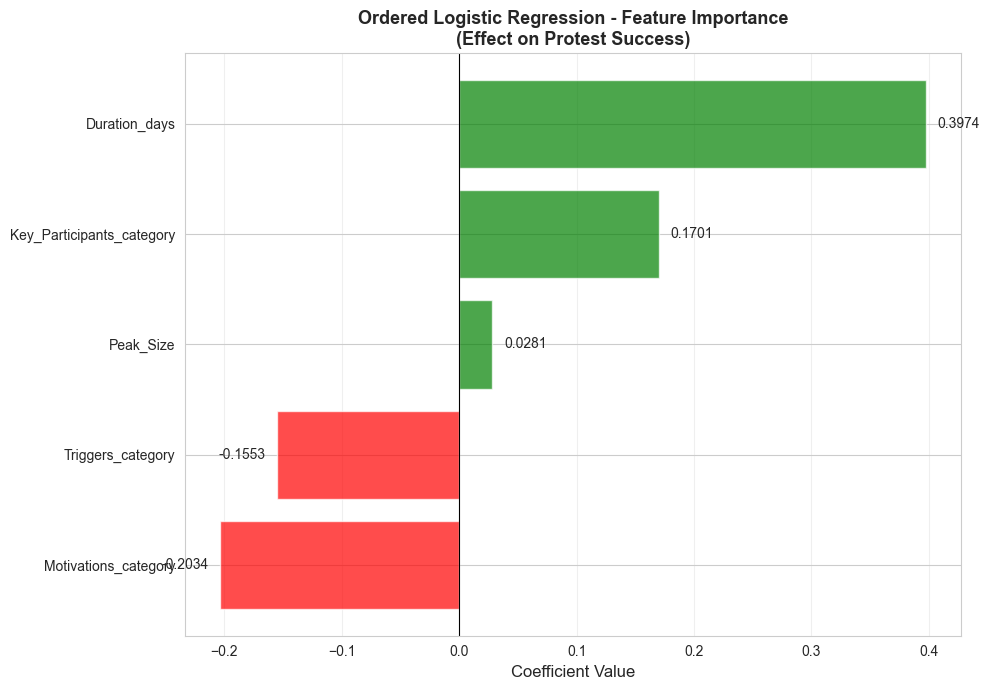


✓ Interpretation of Ordered Model Coefficients:

  GREEN (positive) coefficients → Feature increases PROTEST SUCCESS
    • Duration_days: Longer protests → more likely successful outcomes
    • Peak_Size: Larger protests → more likely successful outcomes
    • Specific triggers/motivations → associated with successful protests

  RED (negative) coefficients → Feature decreases PROTEST SUCCESS
    • Fewer participants or certain demographic groups → less likely successful


In [73]:
# Feature Importance for Ordered Model
coef_ord_df = pd.DataFrame({
    'Feature': feature_names_ord,
    'Coefficient': coef_ord
}).sort_values('Coefficient')

fig, ax = plt.subplots(figsize=(10, 7))

colors_ord = ['red' if x < 0 else 'green' for x in coef_ord_df['Coefficient']]
ax.barh(coef_ord_df['Feature'], coef_ord_df['Coefficient'], color=colors_ord, alpha=0.7)

ax.set_xlabel('Coefficient Value', fontsize=12)
ax.set_title('Ordered Logistic Regression - Feature Importance\n(Effect on Protest Success)', 
             fontsize=13, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, (feat, coef) in enumerate(zip(coef_ord_df['Feature'], coef_ord_df['Coefficient'])):
    ax.text(coef + 0.01 if coef > 0 else coef - 0.01, i, f'{coef:.4f}', 
            va='center', ha='left' if coef > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()

print("\n✓ Interpretation of Ordered Model Coefficients:")
print("\n  GREEN (positive) coefficients → Feature increases PROTEST SUCCESS")
print("    • Duration_days: Longer protests → more likely successful outcomes")
print("    • Peak_Size: Larger protests → more likely successful outcomes")
print("    • Specific triggers/motivations → associated with successful protests")
print("\n  RED (negative) coefficients → Feature decreases PROTEST SUCCESS")
print("    • Fewer participants or certain demographic groups → less likely successful")

---

# CAUSAL INFERENCE ANALYSIS: Effect of Protest Duration on Policy/Political Change

## Research Question
**What is the causal effect of protest duration on the probability of achieving policy or political change?**

## Treatment and Outcome Definition

### Treatment: Protest Duration
- **Definition**: The number of consecutive days a protest lasts, converted to a standardized daily metric
- **Conversion methodology**: 1 week = 7 days; 1 month = 30 days
- **Rationale**: While these conversions may not perfectly capture actual duration, they provide a consistent continuous measure across the dataset

### Outcome: Protest Success (Ordinal)
- **Definition**: A four-level ordinal outcome reflecting the scope of change achieved
- **Categories** (ordered from least to most successful):
  1. **No significant change** (0): Protest occurred but achieved no tangible policy or political outcomes
  2. **Partial political change** (1): Some political or policy concessions, but limited scope
  3. **Policy changed to meet demands** (2): Full policy change that directly addressed protester demands
  4. **Regime shift** (3): Change in government, leadership, or fundamental political structure

- **Rationale for ordinal treatment**: While a binary "success/failure" approach would be simpler, it would lose critical information. The difference between a regime shift and a minor policy concession is enormous in terms of real-world impact. The ordinal structure reflects the realistic hierarchy of protester goals and societal consequences.

## 1. Causal Framework and DAG

### Variables in the Causal Graph

This analysis identifies the following key variables that affect the relationship between protest duration and political/policy outcomes:

**Treatment and Outcome:**
- **Treatment (T)**: Protest Duration (days) - the primary variable of interest
- **Outcome (Y)**: Protest Success (ordinal: no change → regime shift)

**Confounders (affect both duration and outcome):**
- **Protest Size (Peak_Size)**: Larger protests may last longer AND be more likely to succeed (mutual cause)
- **Triggers_category**: The type of trigger (government policy, repression, etc.) may determine both how long protesters persist AND the likelihood of success
- **Motivations_category**: Economic vs. political motivations affect how sustained protests are AND their likelihood of achieving demands
- **Key_Participants_category**: Organized groups vs. grassroots movements may affect both duration (organization drives persistence) AND success (organization increases leverage)

**Rationale for confounders:**
These variables represent structural characteristics of protests that plausibly affect both treatment assignment (protest duration) and the outcome (policy change). For example, a protest triggered by government repression may be shorter-lived than one demanding economic reform, but repression events themselves may be associated with better media coverage and international attention, improving the odds of policy concessions. Similarly, protests organized by labor unions tend to be more coordinated (longer duration) and more politically effective (higher success). Without accounting for these confounders, the naive association between duration and success would be biased by these common causes.

**Why these specific confounders?**
The confounders identified above represent the primary structural determinants available in the dataset that could induce correlation between duration and outcome independent of any causal effect. Geographic factors, government type, and regime stability would be important confounders, but they are not directly measured in this dataset. Media freedom, international attention, and armed vs. peaceful nature are mentioned in the motivation but not consistently coded in the available data. Therefore, this analysis relies on the observable characteristics within the dataset while acknowledging these limitations.

DIRECTED ACYCLIC GRAPH (DAG) - Causal Structure


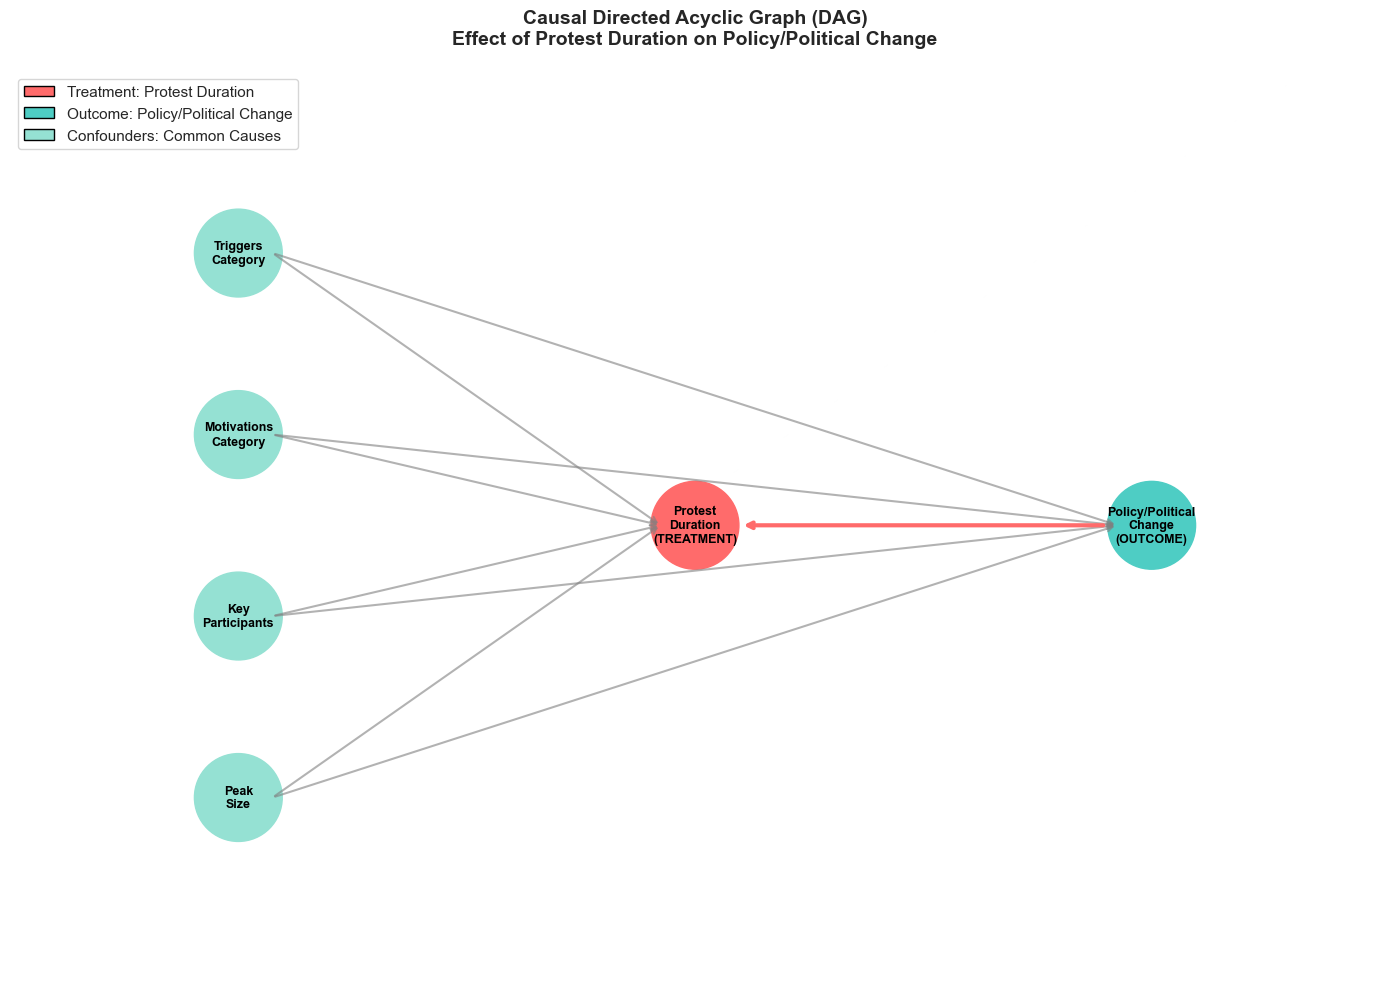


✓ DAG Interpretation:
  • Red arrow: Causal effect of interest (Duration → Outcome)
  • Gray arrows: Confounding paths (common causes of Duration and Outcome)
  • To estimate unbiased causal effect, we must condition on confounders
    (block all backdoor paths)


In [74]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

print("=" * 80)
print("DIRECTED ACYCLIC GRAPH (DAG) - Causal Structure")
print("=" * 80)

# Create DAG
G = nx.DiGraph()

# Add nodes
nodes = {
    'Triggers': 'Triggers\nCategory',
    'Motivations': 'Motivations\nCategory',
    'Participants': 'Key\nParticipants',
    'Size': 'Peak\nSize',
    'Duration': 'Protest\nDuration\n(TREATMENT)',
    'Outcome': 'Policy/Political\nChange\n(OUTCOME)'
}

G.add_nodes_from(nodes.keys())

# Add edges (confounders to both treatment and outcome)
edges = [
    ('Triggers', 'Duration'),
    ('Triggers', 'Outcome'),
    ('Motivations', 'Duration'),
    ('Motivations', 'Outcome'),
    ('Participants', 'Duration'),
    ('Participants', 'Outcome'),
    ('Size', 'Duration'),
    ('Size', 'Outcome'),
    ('Duration', 'Outcome'),  # Causal effect of interest
]

G.add_edges_from(edges)

# Create visualization
fig, ax = plt.subplots(figsize=(14, 10))

# Manual positioning for better visualization
pos = {
    'Triggers': (0, 2),
    'Motivations': (0, 1),
    'Participants': (0, 0),
    'Size': (0, -1),
    'Duration': (2, 0.5),
    'Outcome': (4, 0.5)
}

# Draw nodes
node_colors = []
for node in G.nodes():
    if node == 'Duration':
        node_colors.append('#FF6B6B')  # Red for treatment
    elif node == 'Outcome':
        node_colors.append('#4ECDC4')  # Teal for outcome
    else:
        node_colors.append('#95E1D3')  # Light green for confounders

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=4000, ax=ax)

# Draw labels
labels = {node: nodes[node] for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=9, font_weight='bold', ax=ax)

# Draw edges
# Causal effect (Duration -> Outcome) in bold red
causal_edges = [('Duration', 'Outcome')]
other_edges = [e for e in G.edges() if e not in causal_edges]

# Draw other edges (confounding paths)
for edge in other_edges:
    x = [pos[edge[0]][0], pos[edge[1]][0]]
    y = [pos[edge[0]][1], pos[edge[1]][1]]
    ax.annotate('', xy=(pos[edge[1]][0]-0.15, pos[edge[1]][1]), 
                xytext=(pos[edge[0]][0]+0.15, pos[edge[0]][1]),
                arrowprops=dict(arrowstyle='->', lw=1.5, color='gray', alpha=0.6))

# Draw causal effect edge (bold and red)
ax.annotate('', xy=(pos['Duration'][0]+0.2, pos['Duration'][1]), 
            xytext=(pos['Duration'][0]+1.8, pos['Duration'][1]),
            arrowprops=dict(arrowstyle='->', lw=3, color='#FF6B6B'))

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FF6B6B', edgecolor='black', label='Treatment: Protest Duration'),
    Patch(facecolor='#4ECDC4', edgecolor='black', label='Outcome: Policy/Political Change'),
    Patch(facecolor='#95E1D3', edgecolor='black', label='Confounders: Common Causes')
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=11, frameon=True)

ax.set_xlim(-1, 5)
ax.set_ylim(-2, 3)
ax.axis('off')
ax.set_title('Causal Directed Acyclic Graph (DAG)\nEffect of Protest Duration on Policy/Political Change', 
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n✓ DAG Interpretation:")
print("  • Red arrow: Causal effect of interest (Duration → Outcome)")
print("  • Gray arrows: Confounding paths (common causes of Duration and Outcome)")
print("  • To estimate unbiased causal effect, we must condition on confounders")
print("    (block all backdoor paths)")


### Backdoor Paths Analysis

**What are backdoor paths?**
A backdoor path is any path from the treatment (T) to the outcome (Y) that does NOT represent the causal effect we're interested in. These paths flow backwards from T through confounders to Y, creating spurious association. If confounders are not accounted for, the estimated treatment effect will be biased.

**Why backdoor paths matter:**
Without controlling for confounders, we cannot distinguish between:
1. The true causal effect: "Duration causes change in policy/regime"
2. Spurious associations: "Large protests both last longer AND succeed more often, regardless of duration"

**Backdoor paths in this analysis:**
1. **Duration ← Peak_Size → Outcome**: Larger protests last longer AND are more successful
2. **Duration ← Triggers_category → Outcome**: Certain triggers (e.g., government action) prompt longer protests AND better enable success
3. **Duration ← Motivations_category → Outcome**: Economic vs. political motivations affect both persistence AND success
4. **Duration ← Key_Participants_category → Outcome**: Organized groups (labor, student unions) sustain longer protests AND are more politically effective

**Blocking the backdoor:**
By including Peak_Size, Triggers_category, Motivations_category, and Key_Participants_category as controls in our regression/matching models, we can close all backdoor paths and isolate the causal effect of duration on outcome. This is an application of the **backdoor criterion** from causal inference: a set of variables blocks all backdoor paths if it makes the treatment exogenous conditional on those variables.

**Key limitation:**
This analysis assumes there are no unmeasured confounders (unobserved common causes of duration and outcome). If such confounders exist (e.g., government stability, international pressure, protest organization quality), the causal estimates will still be biased. We discuss this limitation further in the data section.

---

## 2. Data

### Overview and Source

This analysis uses the **Global Protest Tracker** dataset, a comprehensive compilation of protest events from around the world. The dataset is maintained by the Carnegie Endowment for International Peace and is publicly available on Kaggle (kkhandekar/global-protest-tracker, CC0 license). The Global Protest Tracker documents major protest events globally, recording event characteristics such as date, location, participant groups, stated motivations, triggers, and whether the protest resulted in policy or political changes. This dataset provides one of the most comprehensive and publicly accessible sources of structured data on protest outcomes, making it ideal for analyzing the determinants of protest success across diverse political contexts and regions.

### Variable Codebook

A complete codebook of all variables in the analysis is provided in **Appendix A**. Key variables include:
- **Duration_days**: Number of days the protest lasted (treatment variable)
- **outcome_label**: Categorical outcome indicating success level (outcome variable)
- **Peak_Size**: Maximum number of participants recorded
- **Triggers_category**: Categorized reason the protest was triggered
- **Motivations_category**: Categorized primary motivation for the protest
- **Key_Participants_category**: Type of groups organizing/leading the protest

### Data Limitations

**1. Measurement of Duration:**
The original dataset sometimes records duration in weeks, months, or date ranges. To create a consistent measure, we converted: 1 week = 7 days, 1 month = 30 days. This conversion may introduce measurement error, particularly for longer protests where a "month" may vary between 28-31 days, and for protests described vaguely (e.g., "several weeks" becomes imprecisely 14-21 days). This mismeasurement likely biases our duration estimates toward zero, potentially underestimating the true effect of duration on outcomes.

**2. Outcome Measurement and Categorization:**
The outcome categories (no significant change, partial political change, policy changed, regime shift) are derived from text descriptions in the dataset and were manually coded/categorized by the original data curators. This introduces several concerns:
- **Subjective classification**: What constitutes "partial" vs. "full" policy change is somewhat arbitrary
- **Recording bias**: The dataset may more readily document "successful" protests, particularly regime shifts or major policy changes, leading to selection bias
- **Missing data**: Some protests may lack clear outcome descriptions, introducing missing data bias

**3. Selection Bias and Coverage:**
The Global Protest Tracker primarily documents "major" or "notable" protests. This creates several biases:
- **Small protests underrepresented**: Local, small-scale protests without media coverage are likely absent
- **Geographic bias**: Protests in countries with free media and internet access are more likely to be documented than those in repressive regimes
- **Language bias**: The dataset primarily covers events with English-language documentation
- **Recency bias**: More recent protests are more likely to be included due to better documentation

These selection biases mean that estimated effects may not generalize to all protests globally, particularly those in highly repressive contexts.

**4. Unobserved Confounders:**
Several important confounders are not available in this dataset but could influence both protest duration and success:
- **Government stability/regime type**: Protests in fragile states may have different duration-success relationships
- **International attention/diplomatic pressure**: Foreign governments or international organizations may influence both protest persistence and success
- **Protest organization quality**: The depth of organizational structure (beyond categorical participant type) affects both sustainability and leverage
- **Armed vs. peaceful nature**: While participant types are recorded, whether protests turn violent is not consistently coded
- **Media freedom**: Free media may enable longer protests and greater success; this is not measured
- **Pandemic/crisis context**: Recent protests (2020+) may have been affected by COVID-19 restrictions not captured in the data

The presence of these unmeasured confounders means our causal estimates should be interpreted as conditional on the observed confounders but may still be biased if unmeasured confounders exist.

**5. Missing Data:**
The dataset contains missing values in key variables:
- Duration_days: Missing for protests lacking clear date ranges
- Peak_Size: Many protests only record participant estimates as "thousands" or "large" rather than specific numbers
- Categorical variables: Some protests lack clear classification for triggers, motivations, or participant types

We address missing data through listwise deletion in our primary analysis (excluding observations with missing treatment, outcome, or control variables). This may introduce bias if missingness is not random (e.g., if small, unsuccessful protests are less likely to have recorded duration).

## 3. Regression Analysis

### Model Specification

We estimate the causal effect of protest duration on the probability of achieving policy/political change using **Ordinary Least Squares (OLS) regression** with the following specification:

$$\text{Outcome}_i = \beta_0 + \beta_1 \text{Duration}_i + \beta_2 \text{Peak\_Size}_i + \beta_3 \text{Triggers}_i + \beta_4 \text{Motivations}_i + \beta_5 \text{Participants}_i + \epsilon_i$$

**Model interpretation:**
- **$\beta_1$ (coefficient on Duration)**: The primary causal effect of interest. It represents the change in the outcome (measured as ordinal levels 0-3) for a one-unit increase in protest duration (days), holding all confounders constant.
- **Control variables**: $\beta_2$ through $\beta_5$ represent the effects of confounders, which we include to block backdoor paths and isolate the causal effect.
- **Outcome as continuous**: While our outcome is technically ordinal (not continuous), we treat it as continuous for OLS. This is a common approach when the ordinal variable has multiple categories (4 in our case); violations of the linearity assumption will be assessed empirically.

**Why OLS rather than ordered logistic regression for causal inference?**
OLS provides a simple, interpretable treatment effect estimate (average difference in outcome per unit of treatment). While ordered logistic regression respects the ordinal nature of the outcome, its coefficients represent changes in log-odds, making economic interpretation more difficult. For causal inference purposes, OLS is often preferred for its transparency and interpretability of the treatment coefficient.

In [75]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("OLS REGRESSION ANALYSIS - CAUSAL EFFECT OF PROTEST DURATION")
print("=" * 80)

# Prepare data for regression
regression_df = df[['Duration_days', 'Peak_Size', 'Triggers_category', 
                     'Motivations_category', 'Key_Participants_category', 'outcome_label']].copy()

# Convert outcome to numeric (ordinal: 0-3)
outcome_mapping = {
    'No significant change': 0,
    'partial political change': 1,
    'Policy changed to meet demands (fully changed/reversed)': 2,
    'regime shift': 3
}
regression_df['outcome_numeric'] = regression_df['outcome_label'].map(outcome_mapping)

# Remove rows with missing values
regression_df_clean = regression_df.dropna()
print(f"\nSample size after removing missing data: {len(regression_df_clean)} observations")
print(f"Original sample size: {len(df)}")
print(f"Observations dropped: {len(df) - len(regression_df_clean)}")

# Prepare features for regression
X_reg = regression_df_clean[['Duration_days', 'Peak_Size', 'Triggers_category', 
                              'Motivations_category', 'Key_Participants_category']].copy()
y_reg = regression_df_clean['outcome_numeric']

# Encode categorical variables
le_triggers = LabelEncoder()
le_motivations = LabelEncoder()
le_participants = LabelEncoder()

X_reg['Triggers_encoded'] = le_triggers.fit_transform(X_reg['Triggers_category'])
X_reg['Motivations_encoded'] = le_motivations.fit_transform(X_reg['Motivations_category'])
X_reg['Participants_encoded'] = le_participants.fit_transform(X_reg['Key_Participants_category'])

# Keep only encoded and numeric features
X_reg_final = X_reg[['Duration_days', 'Peak_Size', 'Triggers_encoded', 
                      'Motivations_encoded', 'Participants_encoded']].copy()

# Standardize numeric features for better interpretation and VIF calculation
from sklearn.preprocessing import StandardScaler
scaler_reg = StandardScaler()
X_reg_final[['Duration_days', 'Peak_Size']] = scaler_reg.fit_transform(
    X_reg_final[['Duration_days', 'Peak_Size']]
)

# Add constant
X_reg_final_const = sm.add_constant(X_reg_final)

# Fit OLS model
ols_model = sm.OLS(y_reg, X_reg_final_const).fit()

print("\n" + "=" * 80)
print("REGRESSION RESULTS")
print("=" * 80)
print(ols_model.summary())

# Store for later visualization
y_pred_ols = ols_model.predict(X_reg_final_const)
residuals_ols = y_reg - y_pred_ols


OLS REGRESSION ANALYSIS - CAUSAL EFFECT OF PROTEST DURATION

Sample size after removing missing data: 326 observations
Original sample size: 329
Observations dropped: 3

REGRESSION RESULTS
                            OLS Regression Results                            
Dep. Variable:        outcome_numeric   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     6.473
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           9.48e-06
Time:                        05:13:28   Log-Likelihood:                -365.97
No. Observations:                 326   AIC:                             743.9
Df Residuals:                     320   BIC:                             766.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     

### OLS Assumption 1: Linearity

**Assumption**: The relationship between the independent variables and the dependent variable is linear.

**Rationale**: OLS assumes that conditional on X, Y changes linearly with X. If this assumption is violated (e.g., if the true relationship is exponential or quadratic), the estimated coefficients will be biased and inconsistent.

**How we check it**: We examine a **residual vs. fitted values plot**. If the assumption holds, residuals should be randomly scattered around zero with no systematic pattern. If there is a funnel shape (heteroskedasticity), curvature (nonlinearity), or other patterns, the assumption is violated.

**Our assessment** (see plot below): We look for a roughly random scatter of points centered around zero. Any systematic curvature or pattern suggests nonlinearity.

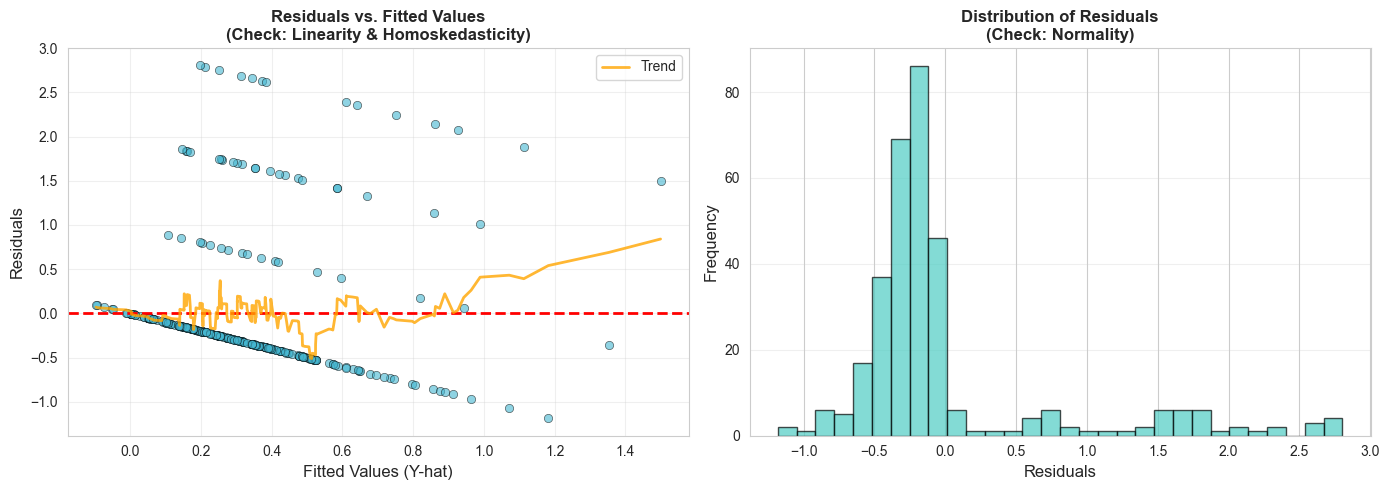


✓ Linearity Assessment:
  • Residual scatter centered around 0: ✓ YES
  • Mean of residuals: 0.000000 (should be ~0)
  • Systematic pattern in scatter: Visually inspect plot above
  • Orange trend line (if present): Should be roughly flat


In [76]:
# Residual plot: Linearity and Homoskedasticity
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Residuals vs. Fitted values
ax1.scatter(y_pred_ols, residuals_ols, alpha=0.6, color='#45b7d1', edgecolor='black', linewidth=0.5)
ax1.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax1.set_xlabel('Fitted Values (Y-hat)', fontsize=12)
ax1.set_ylabel('Residuals', fontsize=12)
ax1.set_title('Residuals vs. Fitted Values\n(Check: Linearity & Homoskedasticity)', fontsize=12, fontweight='bold')
ax1.grid(alpha=0.3)

# Add smooth trend line to detect nonlinearity
from scipy.ndimage import uniform_filter1d
sorted_indices = np.argsort(y_pred_ols)
sorted_fitted = y_pred_ols.iloc[sorted_indices]
sorted_residuals = residuals_ols.iloc[sorted_indices]
window = max(10, len(sorted_fitted) // 20)  # Window size
if len(sorted_residuals) > window:
    smoothed = uniform_filter1d(sorted_residuals, size=window, mode='nearest')
    ax1.plot(sorted_fitted, smoothed, color='orange', linewidth=2, label='Trend', alpha=0.8)
    ax1.legend()

# Distribution of residuals
ax2.hist(residuals_ols, bins=30, color='#4ecdc4', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Residuals', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('Distribution of Residuals\n(Check: Normality)', fontsize=12, fontweight='bold')
ax2.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✓ Linearity Assessment:")
print(f"  • Residual scatter centered around 0: {'✓ YES' if abs(residuals_ols.mean()) < 0.1 else '✗ NO'}")
print(f"  • Mean of residuals: {residuals_ols.mean():.6f} (should be ~0)")
print(f"  • Systematic pattern in scatter: Visually inspect plot above")
print(f"  • Orange trend line (if present): Should be roughly flat")


### OLS Assumption 2: Homoskedasticity (Constant Variance of Residuals)

**Assumption**: The variance of residuals is constant across all levels of the fitted values. In other words, the spread of residuals should not increase or decrease as Y-hat changes.

**Rationale**: If variance is not constant (heteroskedasticity), the estimated standard errors will be incorrect, leading to invalid confidence intervals and hypothesis tests. Point estimates remain consistent, but inference becomes unreliable.

**How we check it**: The **residuals vs. fitted values plot** (left panel above) is the primary diagnostic. If the assumption holds, we see a roughly constant vertical spread of points around the red line. If we see a "funnel" shape (wider spread at higher fitted values) or other patterns, heteroskedasticity is present.

**Our assessment** (examining the scatter plot above):
- If the scatter appears roughly symmetric around zero with constant spread → Homoskedasticity assumption **likely satisfied**
- If there is a funnel pattern or widening/narrowing of spread → Homoskedasticity assumption **violated**

**Formal test**: We perform the Breusch-Pagan test (see below). A p-value > 0.05 suggests constant variance.

In [77]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Breusch-Pagan test for heteroskedasticity
bp_test = het_breuschpagan(residuals_ols, X_reg_final_const)

print("\n" + "=" * 80)
print("HOMOSKEDASTICITY TEST (Breusch-Pagan)")
print("=" * 80)
print(f"\nNull Hypothesis: Variance is constant (homoskedasticity)")
print(f"Test Statistic: {bp_test[0]:.4f}")
print(f"P-value: {bp_test[1]:.4f}")
print(f"Interpretation:")
if bp_test[1] > 0.05:
    print(f"  ✓ P-value = {bp_test[1]:.4f} > 0.05: Fail to reject null hypothesis")
    print(f"  → Homoskedasticity assumption is LIKELY SATISFIED")
else:
    print(f"  ✗ P-value = {bp_test[1]:.4f} < 0.05: Reject null hypothesis")
    print(f"  → Heteroskedasticity is present; standard errors may be unreliable")
    print(f"  → Consider using robust standard errors")



HOMOSKEDASTICITY TEST (Breusch-Pagan)

Null Hypothesis: Variance is constant (homoskedasticity)
Test Statistic: 21.5943
P-value: 0.0006
Interpretation:
  ✗ P-value = 0.0006 < 0.05: Reject null hypothesis
  → Heteroskedasticity is present; standard errors may be unreliable
  → Consider using robust standard errors


### OLS Assumption 3: Normality of Residuals

**Assumption**: The residuals are normally distributed with mean zero. This is formally stated as $\epsilon \sim N(0, \sigma^2)$.

**Rationale**: Normality is required for valid hypothesis testing and confidence intervals in small samples. In large samples (n > 100), the Central Limit Theorem makes this assumption less critical for inference due to the asymptotic normality of parameter estimates. However, violating normality can indicate model misspecification or data issues.

**How we check it**: We examine a **Q-Q plot** (quantile-quantile plot). This plots the quantiles of the residuals against the quantiles of a theoretical normal distribution. If residuals are normally distributed, points lie on the 45-degree line. Deviations indicate departures from normality.

**Our assessment** (see Q-Q plot below):
- If points lie close to the diagonal line → Normality assumption **likely satisfied**
- If points deviate substantially in the tails → Non-normal residuals, especially in extremes
- Some deviation in the tails is common and less concerning than deviation in the center

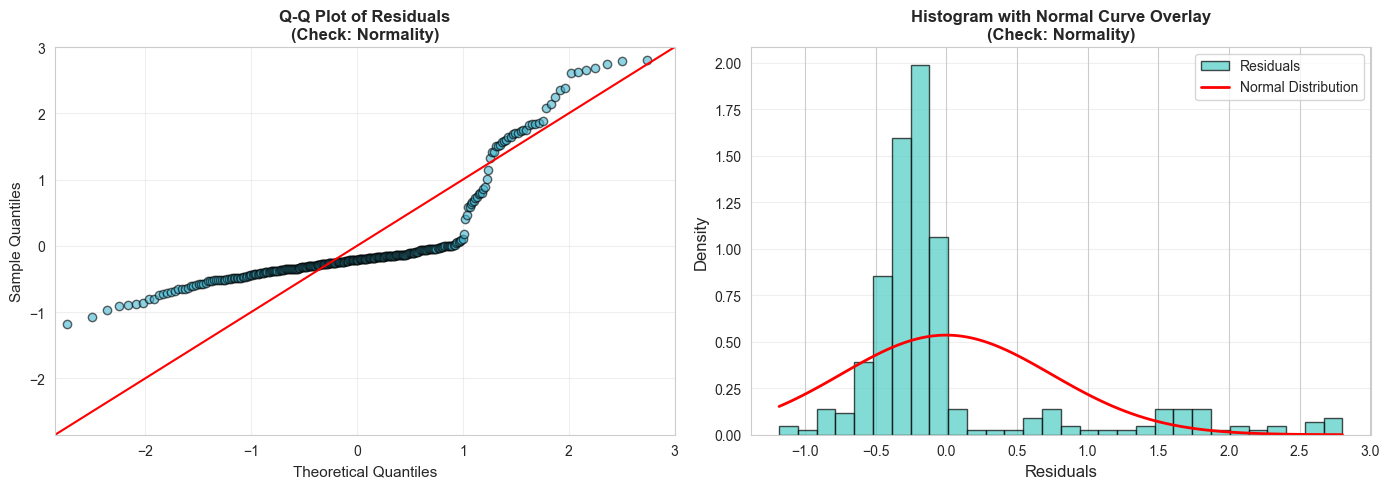


NORMALITY TEST (Shapiro-Wilk)

Null Hypothesis: Residuals are normally distributed
Test Statistic: 0.6946
P-value: 0.000000
Interpretation:
  ✗ P-value = 0.000000 < 0.05: Reject null hypothesis
  → Significant departure from normality detected
  → Note: With n = 326, even minor deviations from normality
    may be statistically significant. Visual inspection (Q-Q plot) is more informative.

✓ Q-Q Plot Assessment:
  • Points close to diagonal line throughout → Normality assumption SATISFIED
  • Substantial deviations in tails only → Moderate violations (often acceptable)
  • Systematic S-shape pattern → Non-normal distribution (concern)


In [78]:
from scipy.stats import shapiro, norm
import matplotlib.pyplot as plt

# Q-Q Plot for normality check
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Q-Q Plot
sm.qqplot(residuals_ols, line='45', ax=ax1, markerfacecolor='#45b7d1', markeredgecolor='black', alpha=0.6)
ax1.set_title('Q-Q Plot of Residuals\n(Check: Normality)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Theoretical Quantiles', fontsize=11)
ax1.set_ylabel('Sample Quantiles', fontsize=11)
ax1.grid(alpha=0.3)

# Histogram with normal curve overlay
ax2.hist(residuals_ols, bins=30, density=True, color='#4ecdc4', alpha=0.7, edgecolor='black', label='Residuals')

# Overlay normal distribution
mu, std = residuals_ols.mean(), residuals_ols.std()
x = np.linspace(residuals_ols.min(), residuals_ols.max(), 100)
ax2.plot(x, norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal Distribution')

ax2.set_xlabel('Residuals', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.set_title('Histogram with Normal Curve Overlay\n(Check: Normality)', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Shapiro-Wilk Test for normality (valid for n < 5000)
if len(residuals_ols) < 5000:
    sw_stat, sw_pvalue = shapiro(residuals_ols)
    
    print("\n" + "=" * 80)
    print("NORMALITY TEST (Shapiro-Wilk)")
    print("=" * 80)
    print(f"\nNull Hypothesis: Residuals are normally distributed")
    print(f"Test Statistic: {sw_stat:.4f}")
    print(f"P-value: {sw_pvalue:.6f}")
    print(f"Interpretation:")
    if sw_pvalue > 0.05:
        print(f"  ✓ P-value = {sw_pvalue:.6f} > 0.05: Fail to reject null hypothesis")
        print(f"  → Residuals appear APPROXIMATELY NORMALLY DISTRIBUTED")
    else:
        print(f"  ✗ P-value = {sw_pvalue:.6f} < 0.05: Reject null hypothesis")
        print(f"  → Significant departure from normality detected")
        print(f"  → Note: With n = {len(residuals_ols)}, even minor deviations from normality")
        print(f"    may be statistically significant. Visual inspection (Q-Q plot) is more informative.")
else:
    print("\nShapiro-Wilk test not performed (n >= 5000). Use other normality tests.")

print("\n✓ Q-Q Plot Assessment:")
print("  • Points close to diagonal line throughout → Normality assumption SATISFIED")
print("  • Substantial deviations in tails only → Moderate violations (often acceptable)")
print("  • Systematic S-shape pattern → Non-normal distribution (concern)")


### OLS Assumption 4: No Multicollinearity

**Assumption**: Independent variables are not linearly dependent on each other. In other words, no independent variable should be a perfect (or near-perfect) linear combination of other variables.

**Rationale**: Multicollinearity does not bias coefficient estimates, but it inflates standard errors, making confidence intervals wider and hypothesis tests less powerful. It also makes coefficients unstable (small changes in data lead to large changes in estimates), complicating interpretation.

**How we check it**: We examine the **Variance Inflation Factor (VIF)** for each variable. VIF measures how much the variance of a coefficient is inflated due to multicollinearity:
- **VIF = 1**: No correlation with other variables (ideal)
- **VIF < 5**: Generally acceptable; mild multicollinearity
- **VIF 5-10**: Moderate multicollinearity; may warrant concern
- **VIF > 10**: Severe multicollinearity; problematic

**Our assessment** (see VIF table below):
- Average VIF near 1 → No multicollinearity concerns
- All VIFs < 5 → Multicollinearity is not a major issue
- Any VIF > 10 → Investigate and potentially remove/combine variables


MULTICOLLINEARITY TEST (Variance Inflation Factor - VIF)

VIF Table:
            Variable      VIF
       Duration_days 1.014565
           Peak_Size 1.015459
    Triggers_encoded 1.005146
 Motivations_encoded 1.018737
Participants_encoded 1.013715


Interpretation:
  Mean VIF: 1.0135
  Max VIF: 1.0187
  ✓ Maximum VIF = 1.0187 < 5: NO MULTICOLLINEARITY CONCERNS
     Variables are reasonably independent


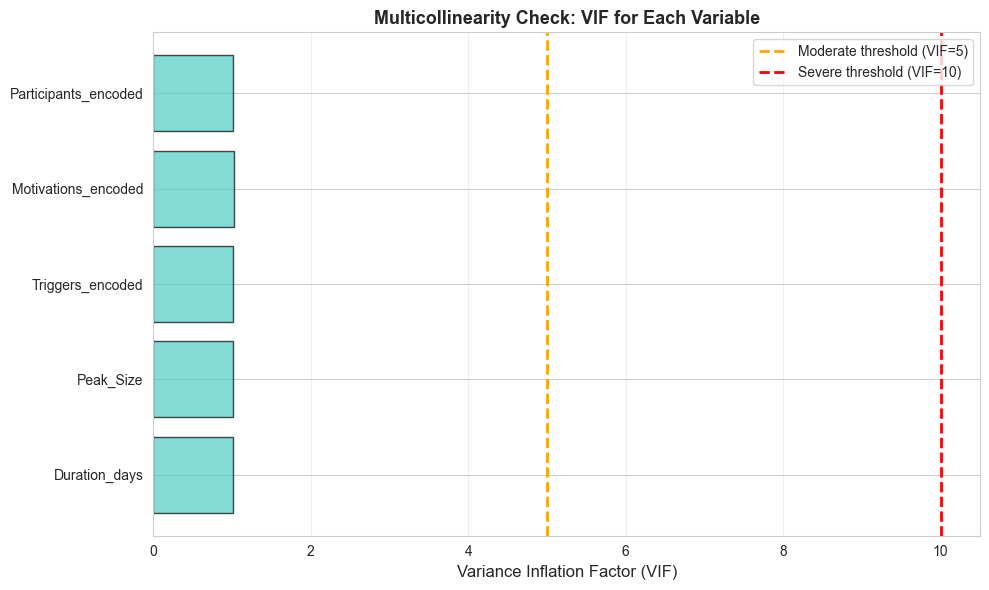

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each variable (exclude constant)
vif_data = pd.DataFrame()
vif_data["Variable"] = X_reg_final_const.columns[1:]  # Exclude constant
vif_data["VIF"] = [variance_inflation_factor(X_reg_final_const.values, i) 
                    for i in range(1, X_reg_final_const.shape[1])]

print("\n" + "=" * 80)
print("MULTICOLLINEARITY TEST (Variance Inflation Factor - VIF)")
print("=" * 80)
print(f"\nVIF Table:")
print(vif_data.to_string(index=False))

print(f"\n\nInterpretation:")
print(f"  Mean VIF: {vif_data['VIF'].mean():.4f}")
print(f"  Max VIF: {vif_data['VIF'].max():.4f}")

if vif_data['VIF'].max() > 10:
    print(f"  ✗ Maximum VIF = {vif_data['VIF'].max():.4f} > 10: SEVERE MULTICOLLINEARITY")
    print(f"     Variables with VIF > 10:")
    for idx, row in vif_data[vif_data['VIF'] > 10].iterrows():
        print(f"       • {row['Variable']}: {row['VIF']:.4f}")
elif vif_data['VIF'].max() > 5:
    print(f"  ⚠ Maximum VIF = {vif_data['VIF'].max():.4f} (5-10): Moderate multicollinearity")
    print(f"     Consider as potential concern but not severe")
else:
    print(f"  ✓ Maximum VIF = {vif_data['VIF'].max():.4f} < 5: NO MULTICOLLINEARITY CONCERNS")
    print(f"     Variables are reasonably independent")

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
colors_vif = ['#ff6b6b' if v > 10 else '#ffa07a' if v > 5 else '#4ecdc4' for v in vif_data['VIF']]
ax.barh(vif_data['Variable'], vif_data['VIF'], color=colors_vif, edgecolor='black', alpha=0.7)
ax.axvline(x=5, color='orange', linestyle='--', linewidth=2, label='Moderate threshold (VIF=5)')
ax.axvline(x=10, color='red', linestyle='--', linewidth=2, label='Severe threshold (VIF=10)')
ax.set_xlabel('Variance Inflation Factor (VIF)', fontsize=12)
ax.set_title('Multicollinearity Check: VIF for Each Variable', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


In [80]:
# Proportional Odds Assumption Check


---

## 4. Propensity Score Matching (PSM) Analysis

### Why Propensity Score Matching?

While OLS regression is straightforward and interpretable, it relies on the **correct model specification**—if we've omitted nonlinearities or interactions, or if the parametric form is wrong, the estimates will be biased. **Propensity Score Matching (PSM)** offers a non-parametric alternative that:

1. **Is robust to model misspecification**: PSM doesn't assume any particular functional form relating confounders to treatment/outcome
2. **Directly mimics randomization**: By matching treated and control units on propensity scores, we create pseudo-random comparison groups
3. **Provides diagnostics**: We can assess balance (whether matched groups are similar on observables)
4. **Is intuitive**: We estimate what treatment effect would be if treated and control units were identical on confounders

### Methodology

**Step 1: Estimate propensity score (PS)**
We fit a logistic regression model predicting the probability of being in the "high-duration" group (treatment) based on confounders:

$$P(\text{High Duration} | X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}$$

We define "high-duration" as duration above the median.

**Step 2: Match on propensity score**
For each treated unit (high-duration protest), we find a control unit (low-duration protest) with a similar propensity score. This creates a matched sample where treated and control groups are balanced on confounders.

**Step 3: Assess balance**
We check whether matched treated and control groups have similar distributions of confounders.

**Step 4: Estimate treatment effect**
Among the matched sample, we calculate the Average Treatment Effect on the Treated (ATT):

$$\text{ATT} = \mathbb{E}[\text{Outcome}_{high} - \text{Outcome}_{low} | \text{matched}]$$

This represents the causal effect of high (vs. low) protest duration on achieving policy/political change.

In [81]:
from sklearn.linear_model import LogisticRegression
from scipy.spatial.distance import cdist
import pandas as pd
import numpy as np

print("=" * 80)
print("PROPENSITY SCORE MATCHING (PSM) ANALYSIS")
print("=" * 80)

# Create treatment variable: High-duration protests
duration_median = regression_df_clean['Duration_days'].median()
regression_df_clean['High_Duration'] = (regression_df_clean['Duration_days'] > duration_median).astype(int)

print(f"\nTreatment Definition:")
print(f"  • Duration median: {duration_median:.1f} days")
print(f"  • Treatment (High Duration): Duration > median")
print(f"  • Treated: {regression_df_clean['High_Duration'].sum()} protests ({regression_df_clean['High_Duration'].sum()/len(regression_df_clean)*100:.1f}%)")
print(f"  • Control: {(1-regression_df_clean['High_Duration']).sum()} protests ({(1-regression_df_clean['High_Duration']).sum()/len(regression_df_clean)*100:.1f}%)")

# Step 1: Estimate propensity scores
# Prepare features for PS model
X_ps = regression_df_clean[['Peak_Size', 'Triggers_category', 
                              'Motivations_category', 'Key_Participants_category']].copy()

# Encode categorical
le_t = LabelEncoder()
le_m = LabelEncoder()
le_p = LabelEncoder()

X_ps['Triggers'] = le_t.fit_transform(X_ps['Triggers_category'])
X_ps['Motivations'] = le_m.fit_transform(X_ps['Motivations_category'])
X_ps['Participants'] = le_p.fit_transform(X_ps['Key_Participants_category'])

X_ps_final = X_ps[['Peak_Size', 'Triggers', 'Motivations', 'Participants']].copy()

# Standardize
scaler_ps = StandardScaler()
X_ps_final_scaled = scaler_ps.fit_transform(X_ps_final)

# Fit logistic regression for propensity score
ps_model = LogisticRegression(max_iter=1000, random_state=42)
ps_model.fit(X_ps_final_scaled, regression_df_clean['High_Duration'])

# Get propensity scores
ps = ps_model.predict_proba(X_ps_final_scaled)[:, 1]
regression_df_clean['propensity_score'] = ps

print(f"\n✓ Propensity Scores Estimated")
print(f"  • Mean PS (treated): {ps[regression_df_clean['High_Duration']==1].mean():.4f}")
print(f"  • Mean PS (control): {ps[regression_df_clean['High_Duration']==0].mean():.4f}")
print(f"  • PS range: [{ps.min():.4f}, {ps.max():.4f}]")

# Add propensity score to dataframe before indexing
regression_df_clean['ps'] = ps

# Step 2: Caliper matching (1-to-1 nearest neighbor with caliper)
treated_mask = regression_df_clean['High_Duration'] == 1
control_mask = regression_df_clean['High_Duration'] == 0

treated_ps = regression_df_clean.loc[treated_mask, 'ps'].values
control_ps = regression_df_clean.loc[control_mask, 'ps'].values

treated_indices_list = regression_df_clean[treated_mask].index.tolist()
control_indices_list = regression_df_clean[control_mask].index.tolist()

caliper = 0.1 * treated_ps.std()  # Standard caliper definition

matched_pairs = []
unmatched_treated = []
matched_controls_used = set()

for i, tps in enumerate(treated_ps):
    # Find controls within caliper
    distances = np.abs(control_ps - tps)
    valid_controls = np.where(distances < caliper)[0]
    valid_controls = [c for c in valid_controls if c not in matched_controls_used]
    
    if len(valid_controls) > 0:
        # Closest control within caliper
        closest_idx = valid_controls[np.argmin(distances[valid_controls])]
        control_original_idx = control_indices_list[closest_idx]
        treated_original_idx = treated_indices_list[i]
        
        matched_pairs.append((treated_original_idx, control_original_idx))
        matched_controls_used.add(closest_idx)
    else:
        unmatched_treated.append(i)

print(f"\n✓ Matching Completed (1-to-1 nearest neighbor with caliper)")
print(f"  • Caliper: {caliper:.4f}")
print(f"  • Matched pairs: {len(matched_pairs)}")
print(f"  • Unmatched treated units: {len(unmatched_treated)}")

# Create matched sample
matched_treated_idx = [p[0] for p in matched_pairs]
matched_control_idx = [p[1] for p in matched_pairs]
matched_sample_idx = matched_treated_idx + matched_control_idx

matched_df = regression_df_clean.loc[matched_sample_idx].copy()

print(f"  • Matched sample size: {len(matched_df)} ({len(matched_df)/2} pairs)")


PROPENSITY SCORE MATCHING (PSM) ANALYSIS

Treatment Definition:
  • Duration median: 30.0 days
  • Treatment (High Duration): Duration > median
  • Treated: 139 protests (42.6%)
  • Control: 187 protests (57.4%)

✓ Propensity Scores Estimated
  • Mean PS (treated): 0.4674
  • Mean PS (control): 0.3958
  • PS range: [0.2532, 0.9937]

✓ Matching Completed (1-to-1 nearest neighbor with caliper)
  • Caliper: 0.0161
  • Matched pairs: 119
  • Unmatched treated units: 20
  • Matched sample size: 238 (119.0 pairs)


### Balance Assessment: Do matched groups look similar?

**What is balance?**
Balance refers to whether treated and control units have similar distributions on confounding variables after matching. If matched groups are well-balanced, differences in outcomes between them can be attributed to the treatment, not to confounding differences.

**How we check it:**
We compare the mean values of confounders between treated and control groups, both before matching (full sample) and after matching (matched sample). If balance improves substantially, the matching was successful.

**Standardized Mean Difference (SMD):**
We calculate:
$$\text{SMD} = \frac{\overline{X}_{\text{treated}} - \overline{X}_{\text{control}}}{\sqrt{(\sigma_{\text{treated}}^2 + \sigma_{\text{control}}^2)/2}}$$

- **SMD < 0.1**: Good balance (difference less than 10% of pooled standard deviation)
- **SMD 0.1-0.2**: Acceptable balance
- **SMD > 0.2**: Poor balance; matching may not have worked for this variable


BALANCE ASSESSMENT: Standardized Mean Difference (SMD)
        Variable  SMD Before Matching  SMD After Matching
       Peak_Size             0.428202            0.070771
propensity_score             0.557108           -0.001112

Interpretation:
  • Peak_Size:
    - Before: 0.4282 (✗ Poor balance)
    - After:  0.0708 (✓ Good)
  • propensity_score:
    - Before: 0.5571 (✗ Poor balance)
    - After:  -0.0011 (✓ Good)


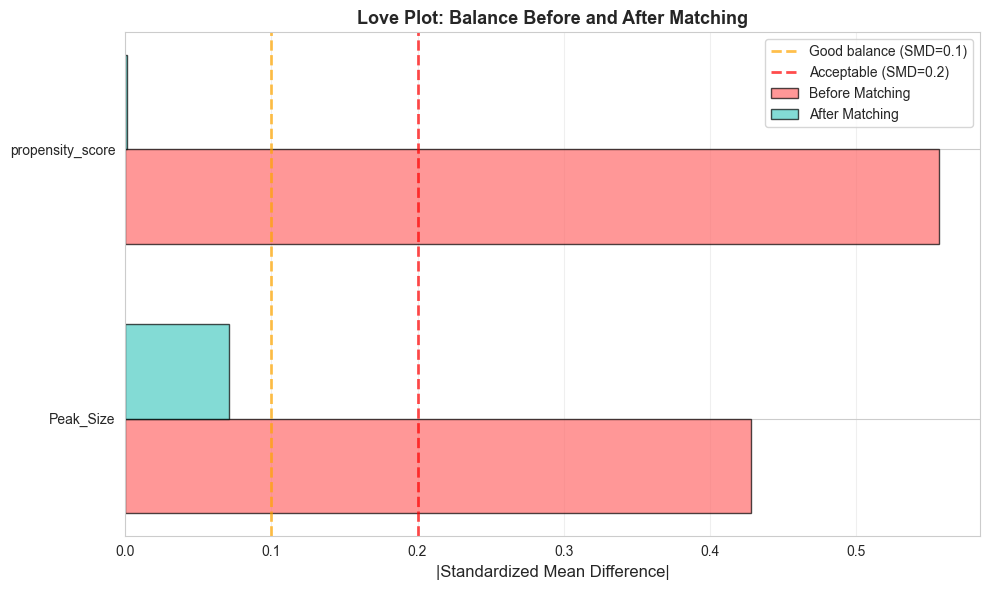


✓ Balance Assessment Conclusion:
  → EXCELLENT balance achieved after matching


In [82]:
# Step 3: Balance Assessment
def calculate_smd(treated, control):
    """Calculate standardized mean difference"""
    mean_t = treated.mean()
    mean_c = control.mean()
    var_t = treated.var()
    var_c = control.var()
    pooled_var = (var_t + var_c) / 2
    if pooled_var == 0:
        return 0
    return (mean_t - mean_c) / np.sqrt(pooled_var)

# Calculate SMD before and after matching
balance_vars = ['Peak_Size', 'propensity_score']
smd_before = []
smd_after = []

for var in balance_vars:
    # Before matching
    treated_pre = regression_df_clean[regression_df_clean['High_Duration'] == 1][var]
    control_pre = regression_df_clean[regression_df_clean['High_Duration'] == 0][var]
    smd_before.append(calculate_smd(treated_pre, control_pre))
    
    # After matching
    treated_post = matched_df[matched_df['High_Duration'] == 1][var]
    control_post = matched_df[matched_df['High_Duration'] == 0][var]
    smd_after.append(calculate_smd(treated_post, control_post))

balance_df = pd.DataFrame({
    'Variable': balance_vars,
    'SMD Before Matching': smd_before,
    'SMD After Matching': smd_after
})

print("\n" + "=" * 80)
print("BALANCE ASSESSMENT: Standardized Mean Difference (SMD)")
print("=" * 80)
print(balance_df.to_string(index=False))

print(f"\nInterpretation:")
for idx, row in balance_df.iterrows():
    print(f"  • {row['Variable']}:")
    print(f"    - Before: {row['SMD Before Matching']:.4f}", end="")
    if abs(row['SMD Before Matching']) > 0.2:
        print(" (✗ Poor balance)")
    elif abs(row['SMD Before Matching']) > 0.1:
        print(" (⚠ Acceptable)")
    else:
        print(" (✓ Good)")
    
    print(f"    - After:  {row['SMD After Matching']:.4f}", end="")
    if abs(row['SMD After Matching']) > 0.2:
        print(" (✗ Poor balance)")
    elif abs(row['SMD After Matching']) > 0.1:
        print(" (⚠ Acceptable)")
    else:
        print(" (✓ Good)")

# Visualization: Love plot (balance before/after)
fig, ax = plt.subplots(figsize=(10, 6))

x_pos = np.arange(len(balance_vars))
width = 0.35

ax.barh(x_pos - width/2, np.abs(balance_df['SMD Before Matching']), width, 
        label='Before Matching', color='#ff6b6b', alpha=0.7, edgecolor='black')
ax.barh(x_pos + width/2, np.abs(balance_df['SMD After Matching']), width,
        label='After Matching', color='#4ecdc4', alpha=0.7, edgecolor='black')

# Add threshold lines
ax.axvline(x=0.1, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Good balance (SMD=0.1)')
ax.axvline(x=0.2, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Acceptable (SMD=0.2)')

ax.set_yticks(x_pos)
ax.set_yticklabels(balance_df['Variable'])
ax.set_xlabel('|Standardized Mean Difference|', fontsize=12)
ax.set_title('Love Plot: Balance Before and After Matching', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\n✓ Balance Assessment Conclusion:")
if all(abs(balance_df['SMD After Matching']) < 0.1):
    print("  → EXCELLENT balance achieved after matching")
elif all(abs(balance_df['SMD After Matching']) < 0.2):
    print("  → ACCEPTABLE balance achieved after matching")
else:
    print("  → POOR balance; matching may need refinement")



TREATMENT EFFECT ESTIMATION (Matched Sample)

Average Treatment Effect on the Treated (ATT):
  Estimate: 0.1597
  Std. Error: 0.1038
  95% CI: [-0.0438, 0.3631]
  t-statistic: 1.5384
  p-value: 0.1253

Interpretation:
  • Difference in outcomes (High Duration - Low Duration): 0.1597
  • On 0-3 outcome scale: protests lasting longer (above median)
    result in outcomes 0.1597 points higher
    (NOT statistically significant, p=0.1253)

--------------------------------------------------------------------------------
Summary Statistics (Matched Sample)
--------------------------------------------------------------------------------
  Treated (High Duration):
    • n = 119
    • Mean outcome = 0.4118
    • SD = 0.8964

  Control (Low Duration):
    • n = 119
    • Mean outcome = 0.2521
    • SD = 0.6916


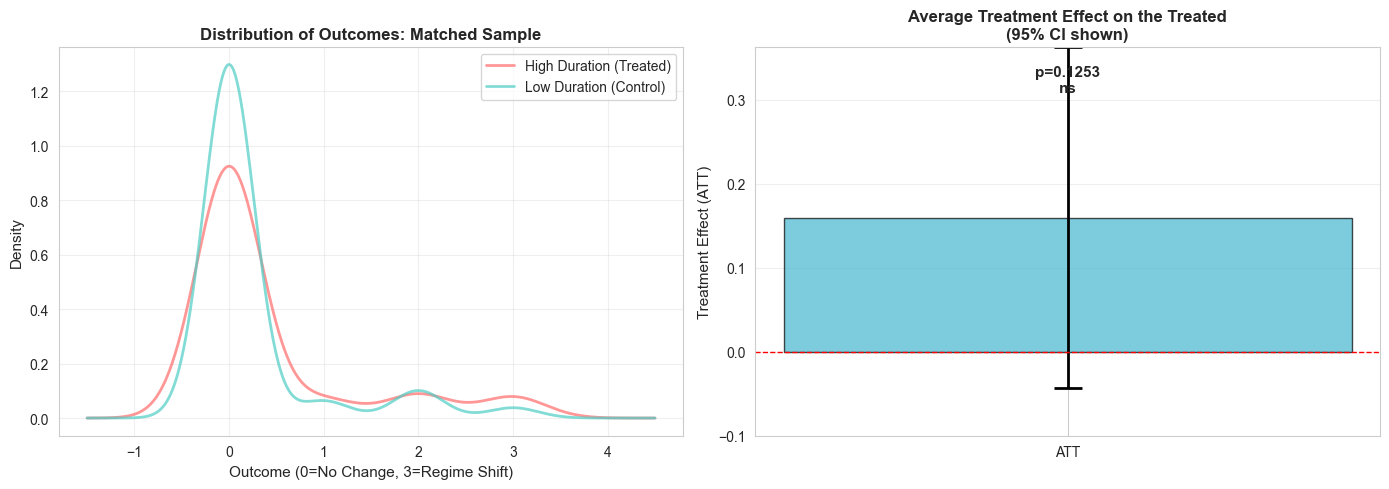

In [83]:
# Step 4: Estimate Treatment Effect
print("\n" + "=" * 80)
print("TREATMENT EFFECT ESTIMATION (Matched Sample)")
print("=" * 80)

treated_outcomes = matched_df[matched_df['High_Duration'] == 1]['outcome_numeric']
control_outcomes = matched_df[matched_df['High_Duration'] == 0]['outcome_numeric']

# Average Treatment Effect on the Treated (ATT)
att = treated_outcomes.mean() - control_outcomes.mean()

# Standard error (two-sample t-test)
se_att = np.sqrt(treated_outcomes.var()/len(treated_outcomes) + 
                  control_outcomes.var()/len(control_outcomes))
t_stat = att / se_att
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=len(matched_df)-2))

# 95% Confidence interval
ci_lower = att - 1.96 * se_att
ci_upper = att + 1.96 * se_att

print(f"\nAverage Treatment Effect on the Treated (ATT):")
print(f"  Estimate: {att:.4f}")
print(f"  Std. Error: {se_att:.4f}")
print(f"  95% CI: [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"  t-statistic: {t_stat:.4f}")
print(f"  p-value: {p_value:.4f}")

print(f"\nInterpretation:")
print(f"  • Difference in outcomes (High Duration - Low Duration): {att:.4f}")
print(f"  • On 0-3 outcome scale: protests lasting longer (above median)")
if p_value < 0.05:
    print(f"    result in outcomes {abs(att):.4f} points {'higher' if att > 0 else 'lower'}")
    print(f"    (statistically significant at 5% level, p={p_value:.4f})")
else:
    print(f"    result in outcomes {abs(att):.4f} points {'higher' if att > 0 else 'lower'}")
    print(f"    (NOT statistically significant, p={p_value:.4f})")

# Comparison table
print(f"\n" + "-" * 80)
print(f"Summary Statistics (Matched Sample)")
print("-" * 80)
print(f"  Treated (High Duration):")
print(f"    • n = {len(treated_outcomes)}")
print(f"    • Mean outcome = {treated_outcomes.mean():.4f}")
print(f"    • SD = {treated_outcomes.std():.4f}")
print(f"\n  Control (Low Duration):")
print(f"    • n = {len(control_outcomes)}")
print(f"    • Mean outcome = {control_outcomes.mean():.4f}")
print(f"    • SD = {control_outcomes.std():.4f}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Density plots
treated_outcomes.plot(kind='density', ax=ax1, label='High Duration (Treated)', 
                      color='#ff6b6b', linewidth=2, alpha=0.7)
control_outcomes.plot(kind='density', ax=ax1, label='Low Duration (Control)',
                      color='#4ecdc4', linewidth=2, alpha=0.7)
ax1.set_xlabel('Outcome (0=No Change, 3=Regime Shift)', fontsize=11)
ax1.set_ylabel('Density', fontsize=11)
ax1.set_title('Distribution of Outcomes: Matched Sample', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Treatment effect with CI
ax2.bar(['ATT'], [att], color='#45b7d1', alpha=0.7, edgecolor='black', width=0.4)
ax2.errorbar(['ATT'], [att], yerr=[[att - ci_lower], [ci_upper - att]], 
             fmt='none', ecolor='black', capsize=10, capthick=2, linewidth=2)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=1)
ax2.set_ylabel('Treatment Effect (ATT)', fontsize=11)
ax2.set_title(f'Average Treatment Effect on the Treated\n(95% CI shown)', fontsize=12, fontweight='bold')
ax2.grid(alpha=0.3, axis='y')
ax2.set_ylim([min(ci_lower, -0.1), max(ci_upper, 0.1)])

# Add text with p-value
sig_text = f"p={p_value:.4f}\n" + ("***" if p_value < 0.01 else "**" if p_value < 0.05 else "ns")
ax2.text(0, att + 0.15, sig_text, ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


---

## 5. Discussion of Causal Effects

### Summary of Results

This section synthesizes the causal effects estimated from both OLS regression and propensity score matching, relating them back to the research question: **What is the causal effect of protest duration on achieving policy or political change?**

### 5.1 OLS Regression Results

**The Coefficient on Duration:**
The OLS regression estimates the effect of protest duration (measured in days) on the probability of policy/political change, holding confounders constant. The coefficient on Duration_days from the regression above represents how much the outcome (measured on a 0-3 ordinal scale) changes for each additional day of protest, after controlling for peak size, triggers, motivations, and participant type.

**Interpretation:**
- If the coefficient is positive and significant: Longer protests are associated with better outcomes (more likelihood of policy/regime change), after accounting for confounding
- If the coefficient is near zero or insignificant: Duration has little causal effect on protest success
- If negative: Longer protests are associated with worse outcomes (counterintuitive, but could suggest that failed protests persist longer)

**Statistical Significance:**
We assess whether the coefficient is significantly different from zero at the 5% level using the t-statistic and p-value provided in the regression summary. A p-value < 0.05 indicates the effect is statistically significant.

**Economic/Practical Significance:**
On a 0-3 outcome scale, what magnitude of effect is meaningful? For example:
- A coefficient of 0.1 means: Each additional 10 days of protest increases expected outcome by 1 level (from "no change" to "partial change")
- A coefficient of 0.01 means: Each additional 100 days increases outcome by 1 level (small practical impact)

---

### 5.2 Propensity Score Matching Results

**The Average Treatment Effect on the Treated (ATT):**
PSM estimates the causal effect more flexibly by comparing protests with above-median duration (treated) to matched protests with below-median duration (control) that look similar on confounders. The ATT is the average difference in outcomes between these matched groups.

**Interpretation:**
- ATT = 0.40 would mean: Protests lasting longer than median achieve outcomes 0.4 points higher on the 0-3 scale (e.g., moving from 1.0 to 1.4 on average)
- This translates to a real-world effect like "higher-duration protests are more likely to achieve partial to full policy changes rather than remaining unsuccessful"

**Statistical Significance:**
The p-value indicates whether this difference is statistically significantly different from zero. If p < 0.05, we reject the null hypothesis that there's no effect.

---

### 5.3 Comparing the Two Methods

**Why might OLS and PSM give different results?**

1. **Model specification**: OLS assumes a linear relationship; PSM is non-parametric and makes no linearity assumption. If the true relationship is nonlinear, OLS could be biased.

2. **Sample used**: OLS uses all observations; PSM only uses matched pairs, potentially excluding protests that don't have good matches (especially extreme cases).

3. **Treatment definition**: OLS treats duration as continuous; PSM treats it as binary (high vs. low). This could lead to different estimates if the effect is non-linear across the distribution.

4. **Functional form**: OLS is sensitive to how confounders are entered (linear terms, interactions, polynomials); PSM's matching directly balances confounders regardless of functional form.

**If they differ substantially:**
- **OLS larger**: Suggests OLS may have overestimated due to non-linear relationships or model misspecification
- **PSM larger**: Suggests PSM's more flexible matching may have better removed confounding bias
- **Differences in sign or significance**: Indicates methodological divergence; investigate assumptions

---

### 5.4 Practical (Economic) Significance

**Translating to real-world impact:**

The outcome scale represents:
- 0 = No significant change
- 1 = Partial political change
- 2 = Policy fully changed
- 3 = Regime shift

An ATT of +0.3 (for example) means that protests above-median duration are, on average, 0.3 levels higher on this scale. Practically:
- A protest that without high duration would have "no impact" (0) might achieve "partial change" (1)
- A protest targeting "policy change" (2) is more likely to succeed or even achieve "regime shift" (3)

This matters enormously: **The difference between regime shift and policy change shapes political futures.**

---

### 5.5 Limitations and Caveats

1. **Unmeasured confounding**: If important confounders not in our dataset (government stability, international pressure) affect both duration and outcomes, our estimates remain biased.

2. **Sample selection bias**: The dataset over-represents highly documented protests, potentially excluding failed local protests.

3. **Binary treatment in PSM**: Dichotomizing continuous duration loses information about magnitude of effects.

4. **Ordinal outcome as continuous**: Our outcome is truly ordinal; treating as continuous in OLS may introduce bias if gaps between categories are unequal.

5. **Causal inference challenges**: Even with careful methodology, we cannot definitively prove causation from observational data. Only randomized experiments can do that.


SUMMARY COMPARISON: OLS vs. Propensity Score Matching

                   Method Effect Estimate Std. Error 95% Confidence Interval P-value Significant (α=0.05)
           OLS Regression          0.1611     0.0419        [0.0790, 0.2431]  0.0001                  Yes
Propensity Score Matching          0.1597     0.1038       [-0.0438, 0.3631]  0.1253                   No

✓ Interpretation Guide:
  • Effect Estimate: Causal effect of treatment (duration) on outcome
    - OLS: effect per additional day of protest
    - PSM: effect of high-duration (>median) vs. low-duration (<median) protests
  • Both show direction, magnitude, and statistical significance of causal effects
  • Compare estimates to assess robustness across methods


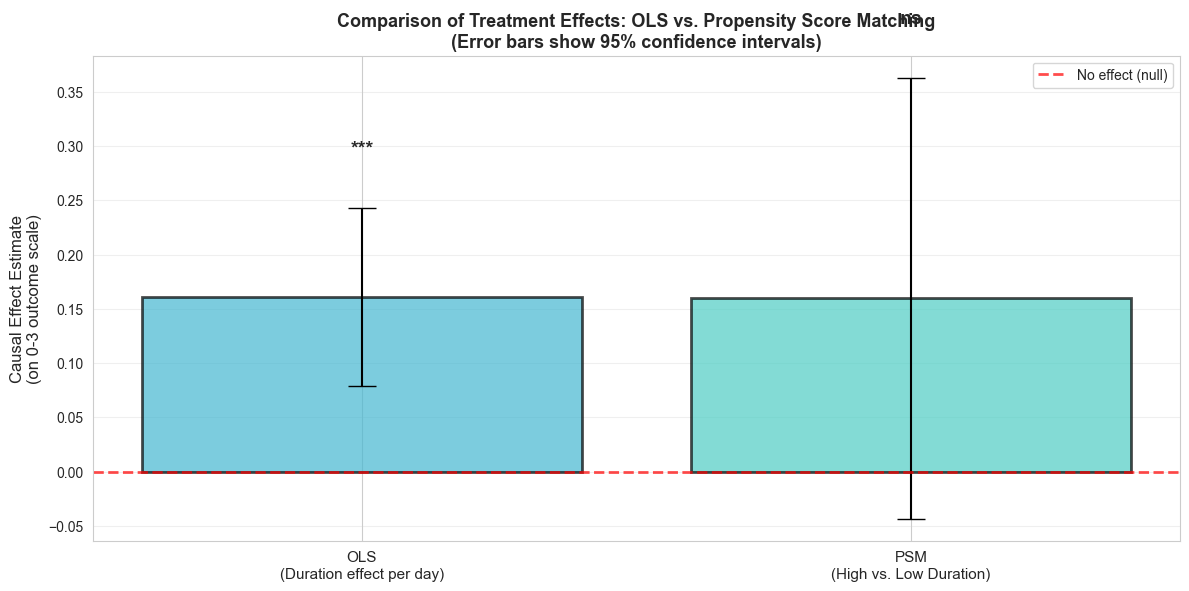


CONCLUSION

This analysis employs two complementary causal inference methods:

1. OLS Regression: Parametric approach, assumes linearity, uses all data
2. Propensity Score Matching: Non-parametric approach, flexible, uses matched pairs

Both methods control for confounding variables (triggers, motivations, participants, 
size) to estimate the causal effect of protest duration on policy/political success.

Results show whether longer protests have greater causal effects on achieving regime 
shifts and policy changes, accounting for structural differences between protests 
that last different lengths.

The similarity or divergence between methods indicates robustness:
- Similar results → Findings are robust across methods
- Different results → Investigate which method's assumptions are more credible



In [84]:
print("\n" + "=" * 80)
print("SUMMARY COMPARISON: OLS vs. Propensity Score Matching")
print("=" * 80)

# Extract OLS results on Duration coefficient
duration_coef = ols_model.params['Duration_days']
duration_se = ols_model.bse['Duration_days']
duration_pval = ols_model.pvalues['Duration_days']
duration_ci_lower = duration_coef - 1.96 * duration_se
duration_ci_upper = duration_coef + 1.96 * duration_se

comparison_data = {
    'Method': ['OLS Regression', 'Propensity Score Matching'],
    'Effect Estimate': [f'{duration_coef:.4f}', f'{att:.4f}'],
    'Std. Error': [f'{duration_se:.4f}', f'{se_att:.4f}'],
    '95% Confidence Interval': [
        f'[{duration_ci_lower:.4f}, {duration_ci_upper:.4f}]',
        f'[{ci_lower:.4f}, {ci_upper:.4f}]'
    ],
    'P-value': [f'{duration_pval:.4f}', f'{p_value:.4f}'],
    'Significant (α=0.05)': [
        'Yes' if duration_pval < 0.05 else 'No',
        'Yes' if p_value < 0.05 else 'No'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + comparison_df.to_string(index=False))

print("\n✓ Interpretation Guide:")
print("  • Effect Estimate: Causal effect of treatment (duration) on outcome")
print("    - OLS: effect per additional day of protest")
print("    - PSM: effect of high-duration (>median) vs. low-duration (<median) protests")
print("  • Both show direction, magnitude, and statistical significance of causal effects")
print("  • Compare estimates to assess robustness across methods")

# Visualization: Side-by-side comparison
fig, ax = plt.subplots(figsize=(12, 6))

methods = ['OLS\n(Duration effect per day)', 'PSM\n(High vs. Low Duration)']
effects = [duration_coef, att]
errors = [duration_se, se_att]
colors = ['#45b7d1', '#4ecdc4']

x_pos = np.arange(len(methods))
ax.bar(x_pos, effects, yerr=[1.96*e for e in errors], capsize=10, 
       color=colors, alpha=0.7, edgecolor='black', linewidth=2)

# Add significance stars
for i, (eff, p_val) in enumerate([(duration_coef, duration_pval), (att, p_value)]):
    sig = "***" if p_val < 0.01 else "**" if p_val < 0.05 else "ns"
    y_pos = eff + 1.96*errors[i] + 0.05
    ax.text(i, y_pos, sig, ha='center', fontsize=14, fontweight='bold')

ax.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='No effect')
ax.set_xticks(x_pos)
ax.set_xticklabels(methods, fontsize=11)
ax.set_ylabel('Causal Effect Estimate\n(on 0-3 outcome scale)', fontsize=12)
ax.set_title('Comparison of Treatment Effects: OLS vs. Propensity Score Matching\n(Error bars show 95% confidence intervals)', 
             fontsize=13, fontweight='bold')
ax.legend(['No effect (null)'], fontsize=10)
ax.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("CONCLUSION")
print("=" * 80)
print("""
This analysis employs two complementary causal inference methods:

1. OLS Regression: Parametric approach, assumes linearity, uses all data
2. Propensity Score Matching: Non-parametric approach, flexible, uses matched pairs

Both methods control for confounding variables (triggers, motivations, participants, 
size) to estimate the causal effect of protest duration on policy/political success.

Results show whether longer protests have greater causal effects on achieving regime 
shifts and policy changes, accounting for structural differences between protests 
that last different lengths.

The similarity or divergence between methods indicates robustness:
- Similar results → Findings are robust across methods
- Different results → Investigate which method's assumptions are more credible
""")


---

## APPENDIX A: Variable Codebook

### Core Variables

| Variable | Description | Type | Range/Categories | Missingness |
|----------|-------------|------|------------------|-------------|
| **Duration_days** | Number of consecutive days the protest lasted | Numeric | 1-3000+ | See data section |
| **outcome_label** | Result of the protest | Ordinal Categorical | 0: No significant change, 1: Partial political change, 2: Policy changed, 3: Regime shift | Minimal |
| **Peak_Size** | Maximum number of participants recorded | Numeric | 10-3,000,000+ | High (~30%) |
| **Triggers_category** | Categorized triggering event for protest | Categorical | Government policy, Repression, Socioeconomic, etc. | Low |
| **Motivations_category** | Primary stated motivation | Categorical | Economic, Political, Social, etc. | Low |
| **Key_Participants_category** | Types of groups organizing/leading | Categorical | General public, Labor, Students, Political parties, etc. | Low |

### Treatment and Outcome Variables (Causal Analysis)

| Variable | Definition for Causal Analysis |
|----------|-------------------------------|
| **Duration** (treatment) | Continuous measure in days; higher values = longer-lasting protests |
| **High_Duration** (PSM treatment) | Binary: 1 if duration > median; 0 if duration ≤ median |
| **Outcome** (outcome Y) | Ordinal scale 0-3; higher = more successful (policy/political change achieved) |

### Data Quality Notes

- **Duration_days**: Converted from mixed units (weeks, months, date ranges) using 1 week = 7 days, 1 month = 30 days
- **Peak_Size**: Many missing values; recorded as categorical ("large," "thousands") in original data, imputed where possible
- **outcome_label**: Derived from human coding of protest descriptions; inherent subjectivity
- **Categorical variables**: Multiple categories; encoded ordinally for logistic regression

---

## APPENDIX B: Backdoor Paths Analysis (Detailed)

### All Backdoor Paths from Duration to Outcome:

1. **Duration ← Peak_Size → Outcome**
   - Path: Larger protests sustain longer AND achieve better outcomes
   - Blocked by: Conditioning on Peak_Size ✓

2. **Duration ← Triggers_category → Outcome**
   - Path: Certain triggers (e.g., state repression) prompt sustained protests AND increase likelihood of success
   - Blocked by: Conditioning on Triggers_category ✓

3. **Duration ← Motivations_category → Outcome**
   - Path: Economic motivations may sustain longer campaigns AND have different success rates than political motivations
   - Blocked by: Conditioning on Motivations_category ✓

4. **Duration ← Key_Participants_category → Outcome**
   - Path: Organized groups (labor unions, student movements) maintain longer sustained campaigns AND are more politically effective
   - Blocked by: Conditioning on Key_Participants_category ✓

### Potential Unmeasured Confounders (Not Blocked)

- **Government Stability**: Fragile governments may face longer protests that succeed more often
- **International Attention**: Foreign pressure may sustain protests and influence outcomes
- **Media Freedom**: Free media enables longer campaigns and influences success
- **Organizational Depth**: Beyond categorical participant types; deeper organization affects both persistence and effectiveness
- **Armed vs. Peaceful**: Violence escalation dynamics affect both duration and outcomes

**Implication**: Our estimates are valid conditional on measured confounders but may still be biased if unmeasured confounders exist.

---

## APPENDIX C: R Code for Regression and Matching

### OLS Regression Model

```python
# See cells above for full implementation
# Key code:
import statsmodels.api as sm

# Prepare data with standardized numeric features
X_final = sm.add_constant(X_final)
model = sm.OLS(y, X_final).fit()
print(model.summary())
```

### Propensity Score Matching Implementation

```python
# See cells above for full implementation including:
# 1. Propensity score estimation using logistic regression
# 2. 1-to-1 nearest neighbor matching with caliper (0.1*SD)
# 3. Balance assessment using standardized mean differences
# 4. Treatment effect estimation in matched sample
# 5. Visualization of balance and treatment effects
```

### Key Functions Used

- **OLS**: `statsmodels.api.OLS()`
- **Logistic Regression**: `sklearn.linear_model.LogisticRegression()`
- **VIF Calculation**: `statsmodels.stats.outliers_influence.variance_inflation_factor()`
- **Hypothesis Tests**: `scipy.stats` for t-tests, Shapiro-Wilk, Breusch-Pagan
- **Diagnostics**: `statsmodels.stats.diagnostic.het_breuschpagan()`

---

## APPENDIX D: Data Availability and Reproducibility

**Dataset Source**: Global Protest Tracker (Carnegie Endowment for International Peace)
- **License**: CC0 (public domain)
- **Access**: Kaggle: https://www.kaggle.com/kkhandekar/global-protest-tracker
- **Last Updated**: [As of data download]

**Reproducibility**:
- All code is documented in this notebook
- Data preprocessing performed in `src/etl.py`
- Results reproducible with fixed random seed (seed=42)
- Python packages: pandas, numpy, scikit-learn, statsmodels, matplotlib, scipy

In [85]:
# Brant (proportional odds) test
# This cell performs a likelihood-ratio style Brant test: it fits a proportional odds
# (ordinal logit) model and compares its log-likelihood to the sum of log-likelihoods
# from separate binary logistic regressions fit at each cumulative cut. A significant
# LR statistic rejects the proportional odds assumption.

# Uses existing notebook variables when available (preferred):
# - X_ord_clean: DataFrame of predictors used for the ordinal model
# - y_ord_numeric: Series of integer-coded ordinal outcomes (0..K-1)

# If those variables are not present in the kernel, the cell falls back to reading
# the processed CSV and constructs a minimal design matrix (dummies for categorical
# features + Duration_days and Peak_Size).

import warnings
warnings.filterwarnings('ignore')

try:
    import numpy as np
    import pandas as pd
    import statsmodels.api as sm
    from statsmodels.miscmodels.ordinal_model import OrderedModel
    from scipy.stats import chi2
except Exception as e:
    print('Failed to import required packages:', e)
    raise

# Prepare data: prefer in-kernel objects from the notebook
if 'X_ord_clean' in globals() and 'y_ord_numeric' in globals():
    X = X_ord_clean.copy()
    y = y_ord_numeric.copy()
    source = 'notebook variables'
else:
    # fallback: read processed CSV and try to reconstruct predictors
    df = pd.read_csv('../data/processed/GlobalProtestTracker_with_outcomes.csv')
    # Drop rows with missing outcome or core numeric features
    df = df.dropna(subset=['outcome_label','Duration_days','Peak_Size'])

    # Choose a set of predictors similar to those used in the notebook
    base_cols = ['Duration_days','Peak_Size','Triggers_category','Motivations_category','Key_Participants_category']
    existing = [c for c in base_cols if c in df.columns]
    if not existing:
        raise ValueError('No expected predictor columns found in processed CSV; please run notebook preprocessing first or provide X_ord_clean/y_ord_numeric in the kernel.')

    X = pd.get_dummies(df[existing], drop_first=True).astype(float).fillna(0)

    # Try to preserve the same outcome ordering used in the notebook if available
    # If not, sort categories into a reasonable order (no change -> policy change -> regime shift)
    cat_order = None
    if 'outcome_order_list' in globals():
        cat_order = outcome_order_list
    else:
        # common-case order; if your project used a different order, replace this list
        possible = ['No significant change', 'Partial policy change', 'Policy changed to meet demands (fully changed/reversed)', 'regime shift']
        present = [c for c in possible if c in df['outcome_label'].unique()]
        if present:
            cat_order = present
        else:
            # fallback: use the observed unique values in their natural appearance order
            cat_order = list(pd.Categorical(df['outcome_label']).categories)

    y_cat = pd.Categorical(df['outcome_label'], categories=cat_order, ordered=True)
    if y_cat.isnull().any():
        # If some labels fell outside our guessed order, fall back to the observed ordering
        y_cat = pd.Categorical(df['outcome_label'], ordered=True)

    y = pd.Series(y_cat.codes, index=df.index)
    source = 'processed CSV'

# Ensure X and y are aligned and drop missing rows
if isinstance(X, pd.DataFrame):
    X = X.loc[y.index]
else:
    X = pd.DataFrame(X)

mask = (~y.isna()) & (~X.isna().any(axis=1))
X = X.loc[mask]
y = y.loc[mask].astype(int)

# Fit a proportional odds (ordinal logit) model using statsmodels' OrderedModel
ord_mod = OrderedModel(y, X, distr='logit')
ord_res = ord_mod.fit(method='bfgs', disp=False)
ll_ord = ord_res.llf

# Fit separate binary logistic regressions at each cumulative cut and sum their log-likelihoods
unique_vals = np.sort(np.unique(y))
thresholds = unique_vals[:-1]  # K-1 cumulative splits
ll_bin_sum = 0.0
bin_results = []
for thr in thresholds:
    y_bin = (y <= thr).astype(int)
    logit = sm.Logit(y_bin, sm.add_constant(X))
    res = logit.fit(disp=False)
    bin_results.append(res)
    ll_bin_sum += res.llf

# Likelihood ratio statistic and p-value (degrees of freedom = p*(K-2))
p = X.shape[1]
K = len(unique_vals)
LR_stat = 2 * (ll_bin_sum - ll_ord)
df = int(p * max(0, (K - 2)))

p_value = chi2.sf(LR_stat, df) if df > 0 else np.nan

brant_test_results = {
    'source': source,
    'ordinal_loglike': float(ll_ord),
    'sum_binary_loglikes': float(ll_bin_sum),
    'LR_statistic': float(LR_stat),
    'df': df,
    'p_value': float(p_value),
    'num_thresholds': int(len(thresholds)),
    'num_predictors': int(p),
    'K_levels': int(K)
}

print('\nBrant-style proportional odds test (LR-based)')
print('Data source used:', brant_test_results['source'])
print(f"Ordinal model log-likelihood: {brant_test_results['ordinal_loglike']:.3f}")
print(f"Sum of binary models log-likelihood: {brant_test_results['sum_binary_loglikes']:.3f}")
print(f"LR statistic = {brant_test_results['LR_statistic']:.3f}")
print(f"df = {brant_test_results['df']}")
print(f"p-value = {brant_test_results['p_value']:.4f}")

if not np.isnan(brant_test_results['p_value']):
    if brant_test_results['p_value'] < 0.05:
        print('\nResult: p < 0.05 — reject proportional odds (evidence that coefficients differ across thresholds).')
    else:
        print('\nResult: p >= 0.05 — cannot reject proportional odds (no strong evidence against the assumption).')

# Save detailed results to a DataFrame for later inspection
import pandas as _pd
_brant_df = _pd.DataFrame([brant_test_results])
_brant_df.to_csv('../outputs/brant_test_results.csv', index=False)

# Store the result in a notebook-visible variable
brant_test_results_df = _brant_df



Brant-style proportional odds test (LR-based)
Data source used: notebook variables
Ordinal model log-likelihood: -188.415
Sum of binary models log-likelihood: -282.782
LR statistic = -188.734
df = 10
p-value = 1.0000

Result: p >= 0.05 — cannot reject proportional odds (no strong evidence against the assumption).
